In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.base import clone
from sklearn.decomposition import FactorAnalysis, FastICA, NMF, PCA
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
base_path = "./ConjuntosDatos/"
endutih_path = base_path + "ENDUTIH2020/conjuntos_de_datos/"
enigh_path = base_path + "ENIGH2020/"

In [4]:
endutih21 = pd.read_csv(endutih_path+"endutih21.csv")
enigh21 = pd.read_csv(enigh_path+"enigh21.csv")

In [5]:
columnas = dict(endutih21.iloc[:,2:23].dtypes)
columnas

{'upm': dtype('int64'),
 'radio': dtype('int64'),
 'tva': dtype('int64'),
 'tvd': dtype('int64'),
 'cel': dtype('int64'),
 'compu': dtype('int64'),
 'internet': dtype('int64'),
 'tv_paga': dtype('int64'),
 'tel': dtype('int64'),
 'estrato': dtype('int64'),
 'entidad': dtype('int64'),
 'ambito': dtype('int64'),
 'loc': dtype('int64'),
 'piso': dtype('int64'),
 'agua': dtype('int64'),
 'drenaje': dtype('int64'),
 'electricidad': dtype('int64'),
 'refri': dtype('int64'),
 'lavadora': dtype('int64'),
 'auto': dtype('int64'),
 'res': dtype('int64')}

In [6]:
def correlacion(c1: np.array, col: np.array):
    pearson = st.pearsonr(c1, col).statistic
    kendall = st.kendalltau(c1, col).correlation
    spearman = st.spearmanr(c1, col).correlation
    
    print(f"KendallTau: {kendall}")
    print(f"Pearson: {pearson}")
    print(f"Spearman: {spearman}")

In [7]:
def plot_correlacion(c1: np.array, col: np.array, col_name: str):
    tmp_data = pd.DataFrame()
    tmp_data["c1"] = c1
    tmp_data[col_name] = pd.Categorical(col)
 
    sns.boxplot(data=tmp_data, y="c1", x=col_name)
    plt.ylabel("C1")
    plt.xlabel(col_name)
    plt.title(f"Comparación entre el PC1 y {col_name}")
    plt.show()

### ENDUTIH -> ENIGH

#### PCA

In [8]:
pca = PCA(n_components=1)

In [9]:
pca.fit(endutih21[columnas.keys()])

PCA(n_components=1)

In [10]:
pca.explained_variance_ratio_

array([1.])

In [11]:
#Primer componente
c1 = pca.transform(endutih21[columnas.keys()]).ravel()
c1

array([-1568607.23314795, -1568607.23314782, -1568599.2331479 , ...,
        1591090.76700472,  1591090.76700465,  1591090.76700482])

**Comparativa con las demás variables**

KendallTau: -0.028980202764737423
Pearson: -0.03798251216604062
Spearman: -0.03955091224012051


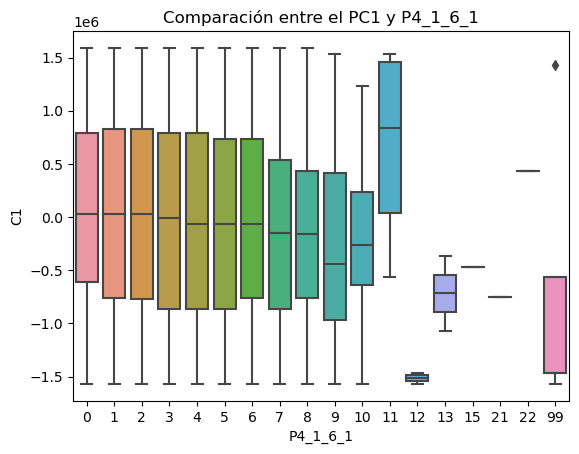

____________________________________________________________________________________________________
KendallTau: 0.03738895595160835
Pearson: 0.04514261655957087
Spearman: 0.04579152516669207


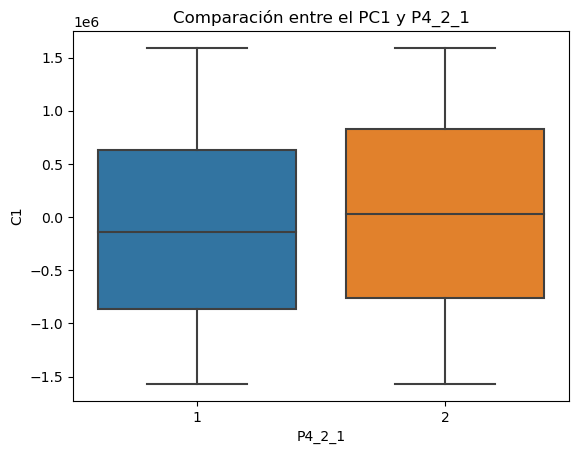

____________________________________________________________________________________________________
KendallTau: 0.038576426718345366
Pearson: 0.04676791732210004
Spearman: 0.04724586097564397


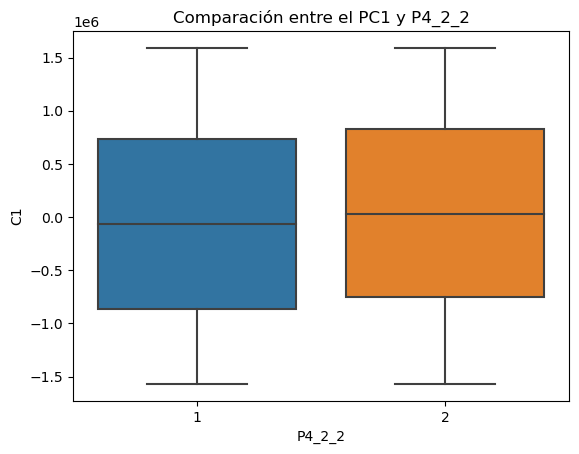

____________________________________________________________________________________________________
KendallTau: 0.040448068918540275
Pearson: 0.049206541701231864
Spearman: 0.049538124793446055


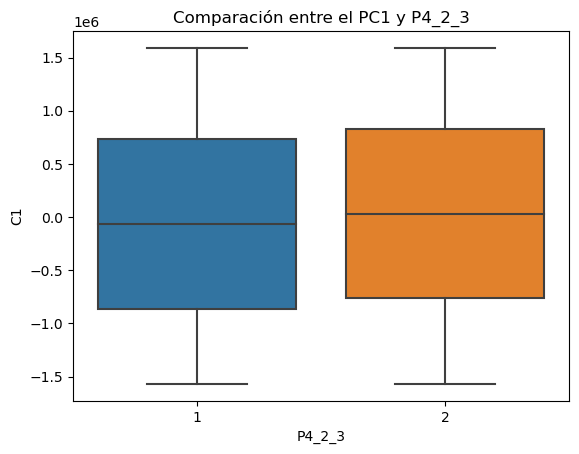

____________________________________________________________________________________________________
KendallTau: 0.03738532059082791
Pearson: 0.03488190351184877
Spearman: 0.0492897813783439


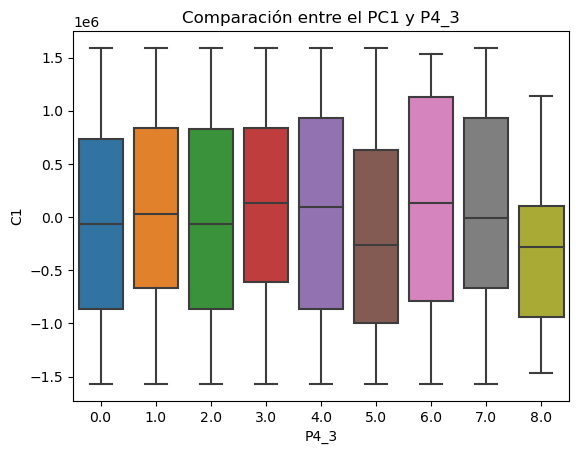

____________________________________________________________________________________________________
KendallTau: -0.05024556947899403
Pearson: -0.06734670101216009
Spearman: -0.06499381299378612


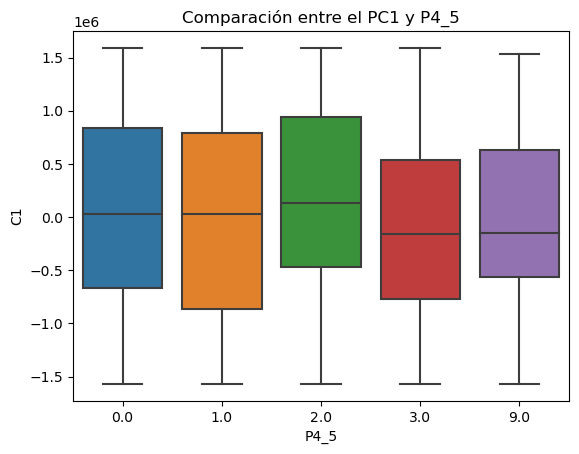

____________________________________________________________________________________________________
KendallTau: -0.04875459469745796
Pearson: -0.06067886710393686
Spearman: -0.06292025372892643


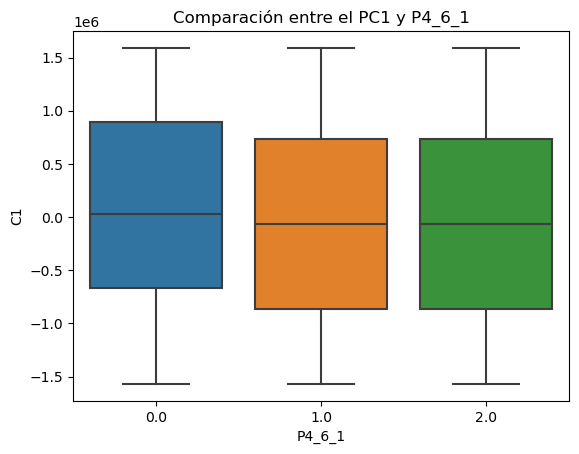

____________________________________________________________________________________________________
KendallTau: -0.0404170150924881
Pearson: -0.04863853861858003
Spearman: -0.05217303009169439


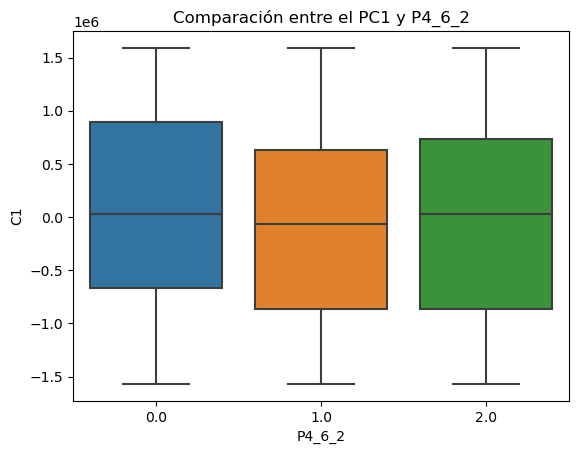

____________________________________________________________________________________________________
KendallTau: -0.05929682713141984
Pearson: -0.07395670324154477
Spearman: -0.074176117281263


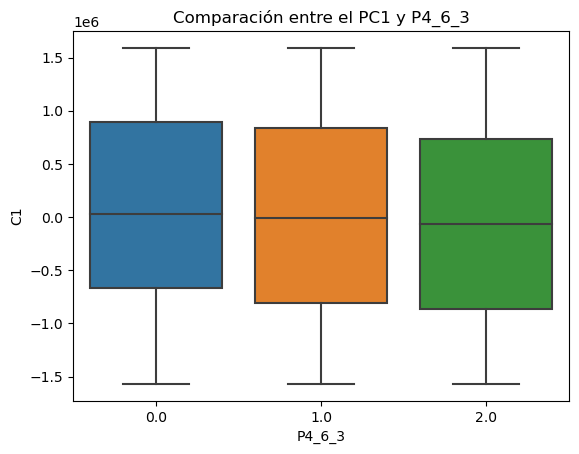

____________________________________________________________________________________________________
KendallTau: -0.06357872325580756
Pearson: -0.07789084858497478
Spearman: -0.07858507225142708


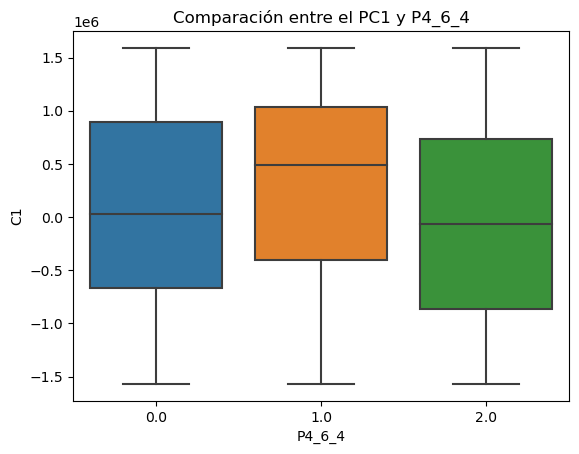

____________________________________________________________________________________________________
KendallTau: -0.05717341127867414
Pearson: -0.06990933544923575
Spearman: -0.07005573021507776


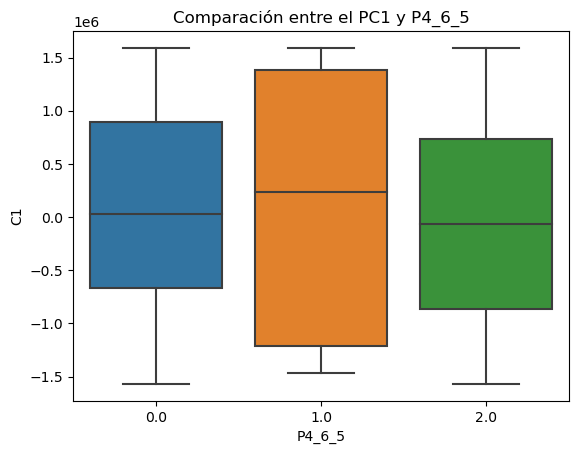

____________________________________________________________________________________________________
KendallTau: -0.03755413958266748
Pearson: -0.047086738874281
Spearman: -0.046055630543909744


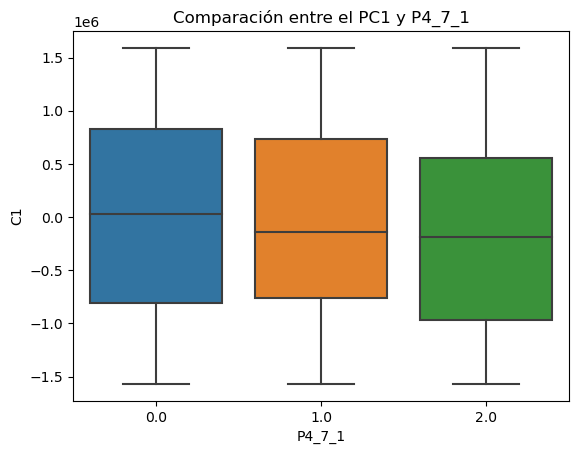

____________________________________________________________________________________________________
KendallTau: -0.03752103694478327
Pearson: -0.047145640717458304
Spearman: -0.046057252422937164


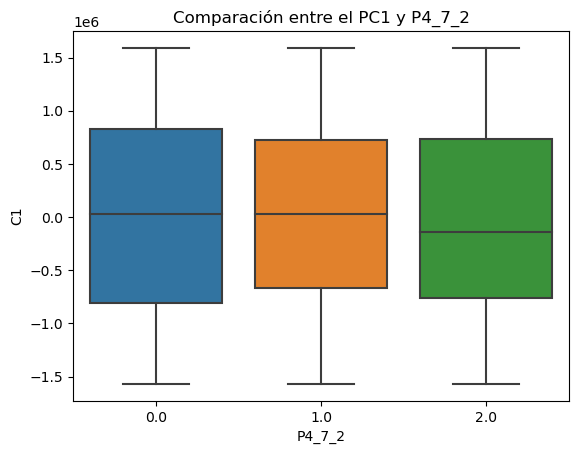

____________________________________________________________________________________________________
KendallTau: -0.037230229529177046
Pearson: -0.04618365310486246
Spearman: -0.0457180923948401


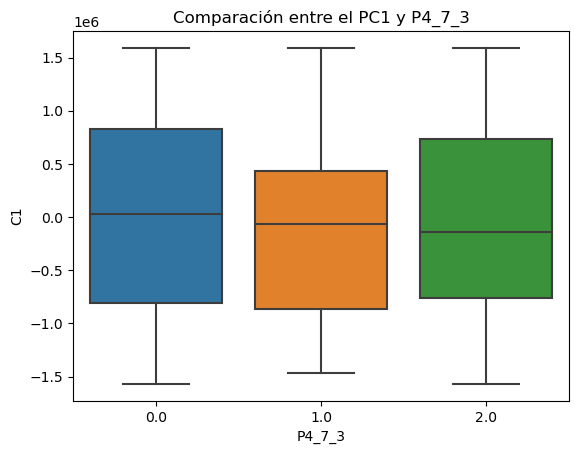

____________________________________________________________________________________________________
KendallTau: 0.03897865338551469
Pearson: 0.029724202162544462
Spearman: 0.050402711249761506


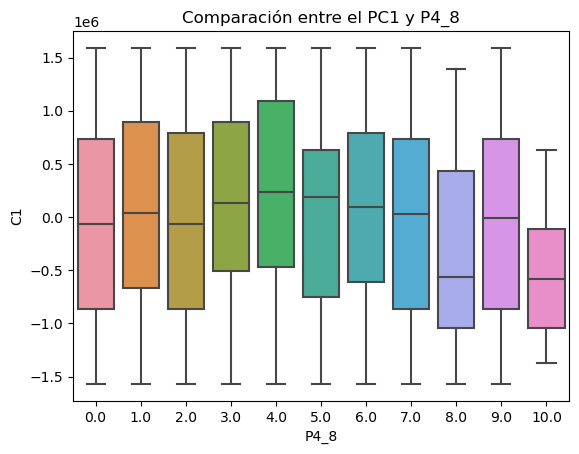

____________________________________________________________________________________________________
KendallTau: -0.002393653337957582
Pearson: 0.002993300082016447
Spearman: -0.003127419499697439


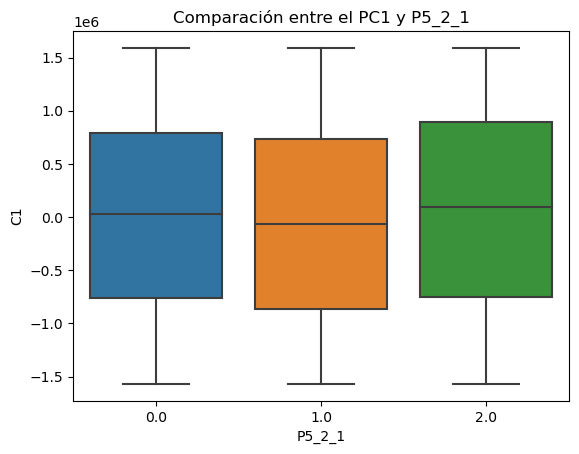

____________________________________________________________________________________________________
KendallTau: -0.01903021132193787
Pearson: -0.027475691960781486
Spearman: -0.024323071810916815


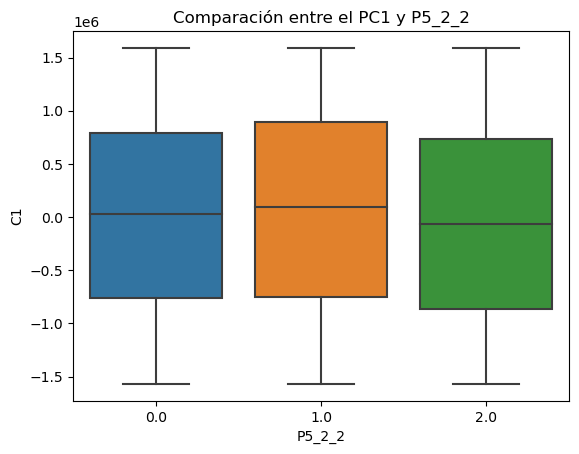

____________________________________________________________________________________________________
KendallTau: -0.012128603179722882
Pearson: -0.01566171608035953
Spearman: -0.015082616716741791


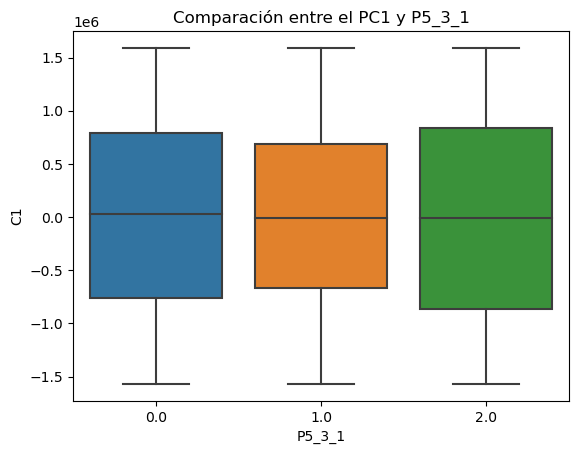

____________________________________________________________________________________________________
KendallTau: -0.011612259387639007
Pearson: -0.014801631961711737
Spearman: -0.014251279607091006


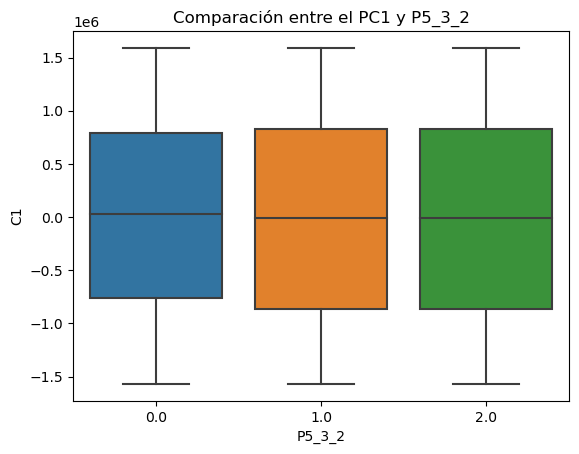

____________________________________________________________________________________________________
KendallTau: -0.0025019131965279087
Pearson: -0.004541011209423717
Spearman: -0.0032584077275633655


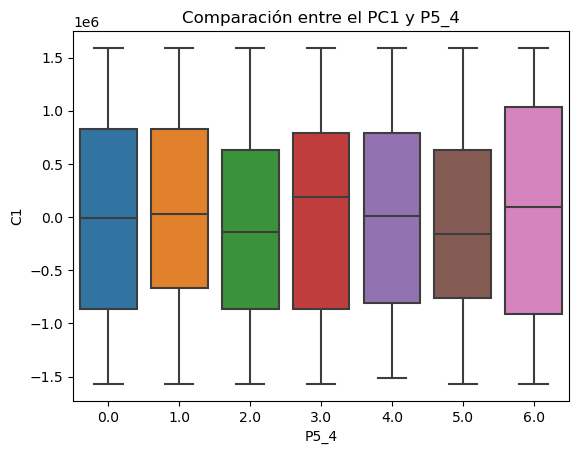

____________________________________________________________________________________________________
KendallTau: 0.04663876812107065
Pearson: 0.05792315654066691
Spearman: 0.06059723520419345


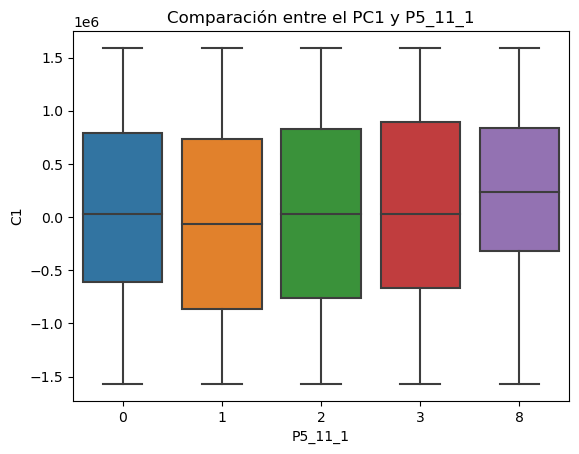

____________________________________________________________________________________________________
KendallTau: 0.004122267211360048
Pearson: 0.005662573147626075
Spearman: 0.005365086065063717


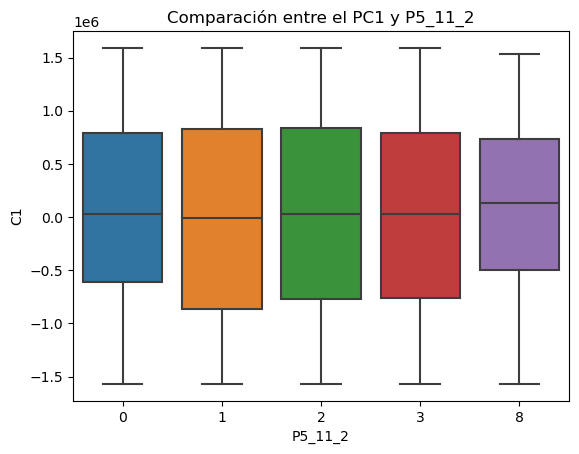

____________________________________________________________________________________________________
KendallTau: 0.042075560630104064
Pearson: 0.05078505260707402
Spearman: 0.053510594484768366


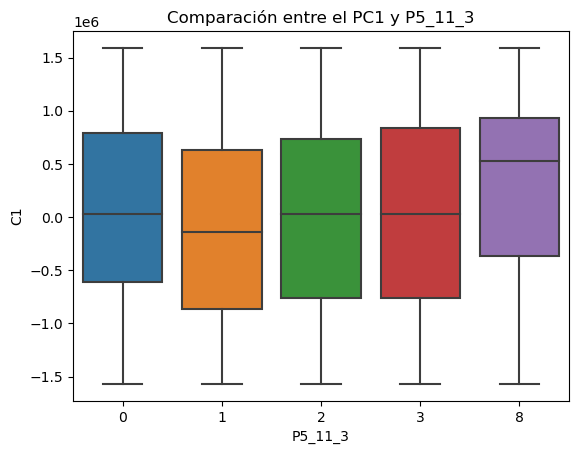

____________________________________________________________________________________________________


In [12]:
for col_name in endutih21[endutih21.columns[23:-1]]:
    col = endutih21[col_name]
    correlacion(c1,col)
    plot_correlacion(c1, col, col_name)
    print("_"*100)

#### FA

In [13]:
fa = FactorAnalysis(n_components=1)

In [14]:
fa.fit(endutih21[columnas.keys()])

FactorAnalysis(n_components=1)

In [15]:
#Primer componente
c1 = fa.transform(endutih21[columnas.keys()]).ravel()
c1

array([-1.69779897, -1.69779897, -1.69779031, ...,  1.72213426,
        1.72213426,  1.72213426])

**Comparativa con las demás variables**

KendallTau: -0.02898127143601844
Pearson: -0.03798251215949672
Spearman: -0.039551729899251785


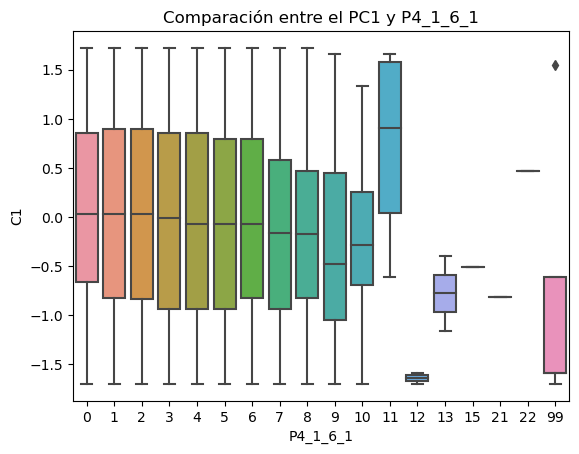

____________________________________________________________________________________________________
KendallTau: 0.03739076696558365
Pearson: 0.04514261655370404
Spearman: 0.045793744504019525


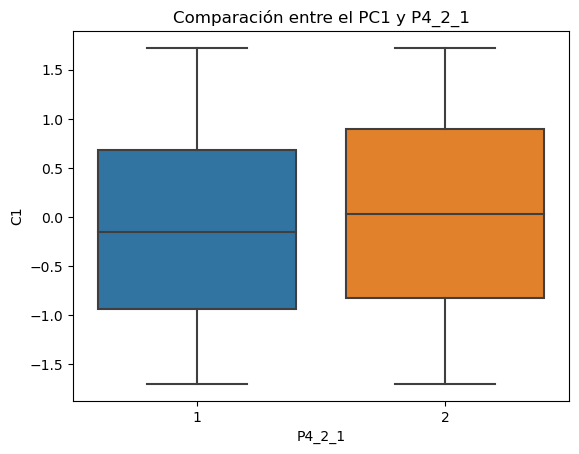

____________________________________________________________________________________________________
KendallTau: 0.038580940048984394
Pearson: 0.046767917313718974
Spearman: 0.047251389974276435


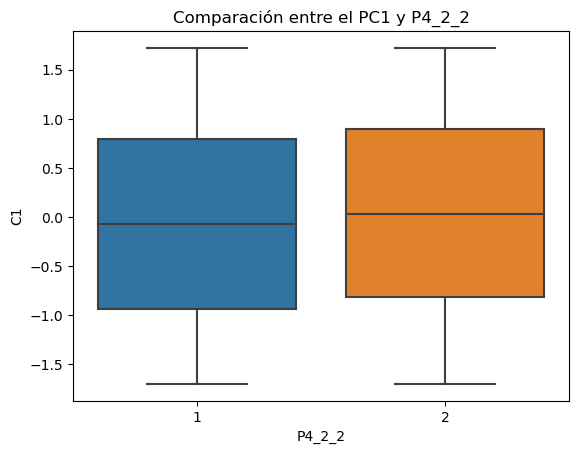

____________________________________________________________________________________________________
KendallTau: 0.040450080382648045
Pearson: 0.049206541696044936
Spearman: 0.049540589737435525


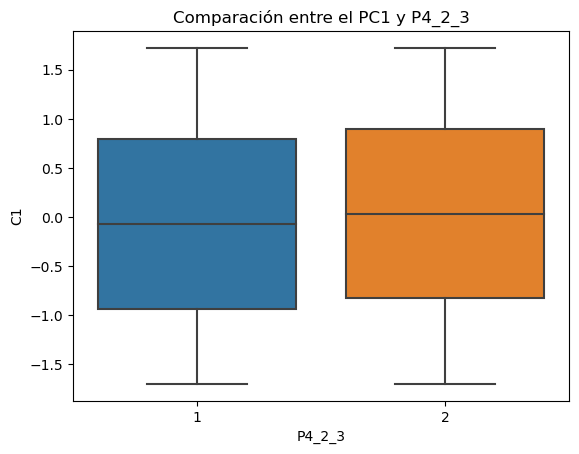

____________________________________________________________________________________________________
KendallTau: 0.037388357813723926
Pearson: 0.03488190350633783
Spearman: 0.04929426113642174


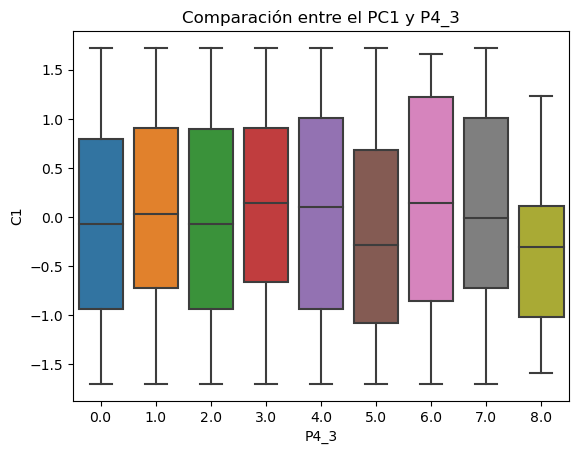

____________________________________________________________________________________________________
KendallTau: -0.05025170704911152
Pearson: -0.06734670100285092
Spearman: -0.06500147694374685


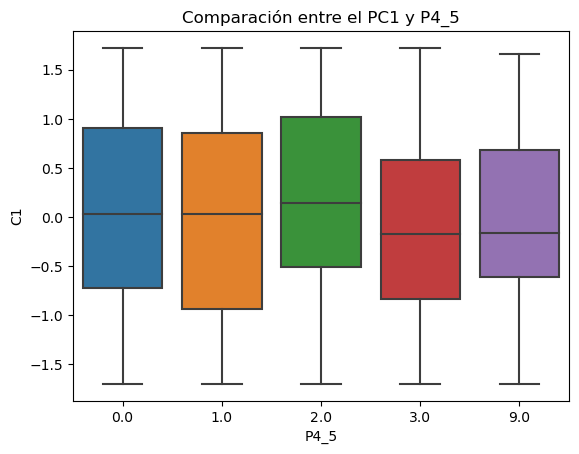

____________________________________________________________________________________________________
KendallTau: -0.04875941827641293
Pearson: -0.06067886709339996
Spearman: -0.06292713062276035


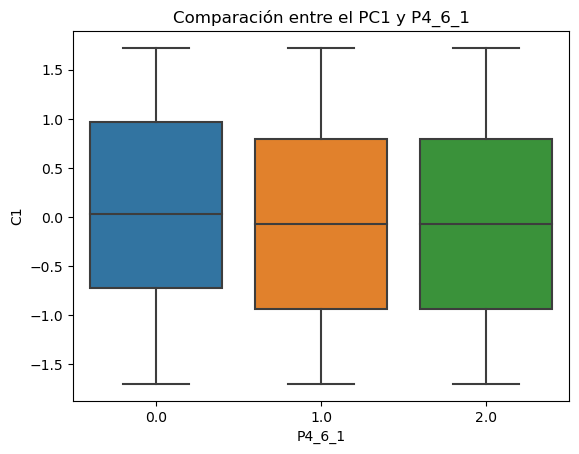

____________________________________________________________________________________________________
KendallTau: -0.04042286917123665
Pearson: -0.04863853860852997
Spearman: -0.05218137009888551


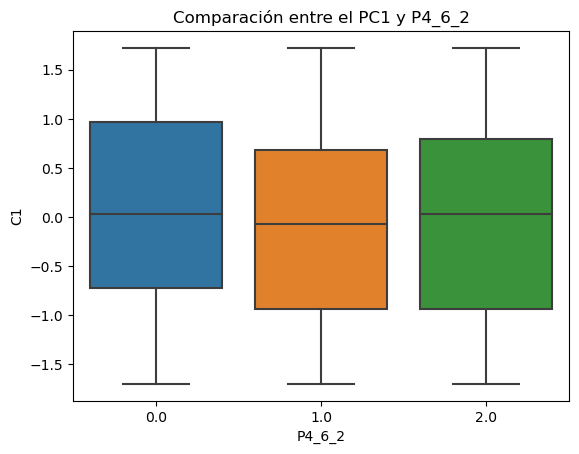

____________________________________________________________________________________________________
KendallTau: -0.059303064557519734
Pearson: -0.07395670322701653
Spearman: -0.07418286663605377


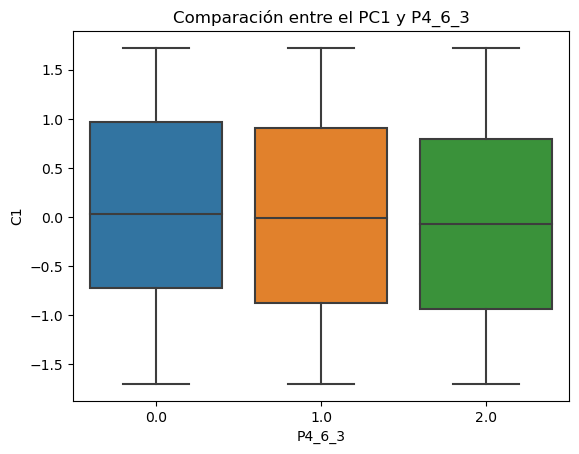

____________________________________________________________________________________________________
KendallTau: -0.06358503266554315
Pearson: -0.07789084857161857
Spearman: -0.07859248504382703


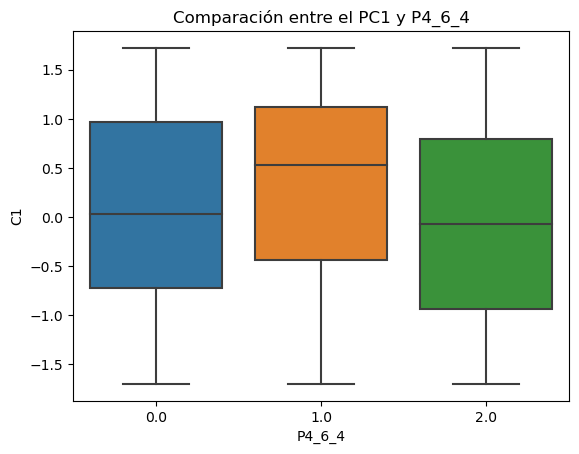

____________________________________________________________________________________________________
KendallTau: -0.057179690116858105
Pearson: -0.0699093354362714
Spearman: -0.07006341228590399


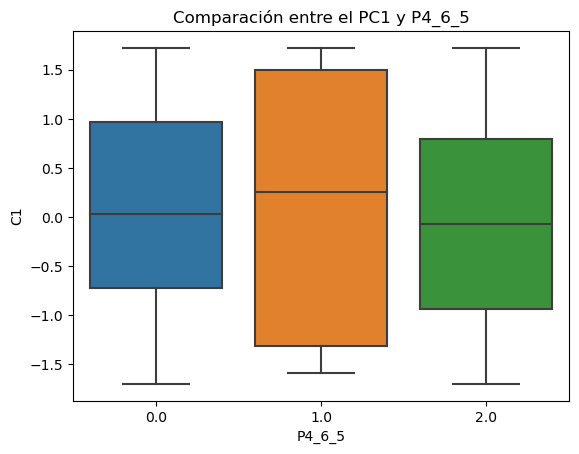

____________________________________________________________________________________________________
KendallTau: -0.037556344615911536
Pearson: -0.04708673887008392
Spearman: -0.046058357743102435


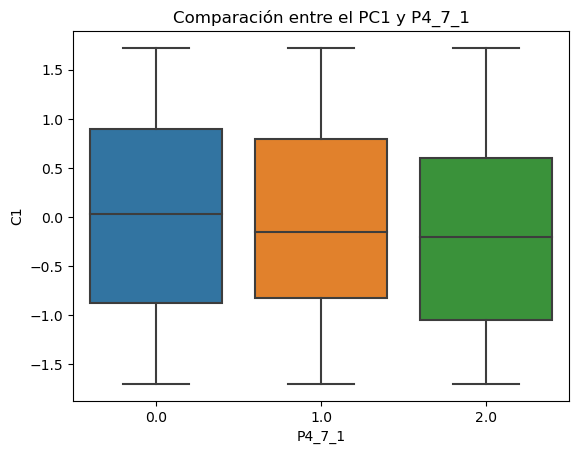

____________________________________________________________________________________________________
KendallTau: -0.03752319870309671
Pearson: -0.04714564071310917
Spearman: -0.04605991564027143


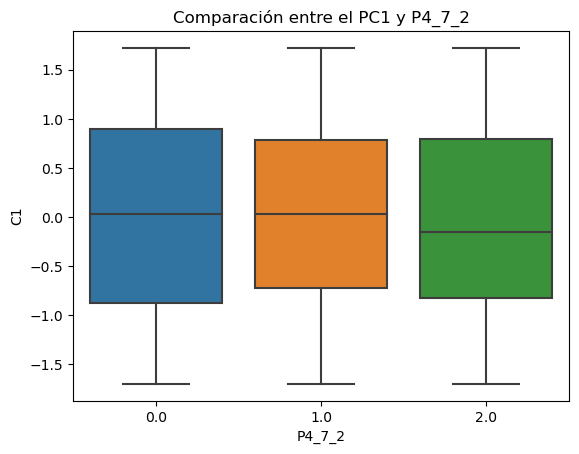

____________________________________________________________________________________________________
KendallTau: -0.03723244646055681
Pearson: -0.04618365310058856
Spearman: -0.04572077032570848


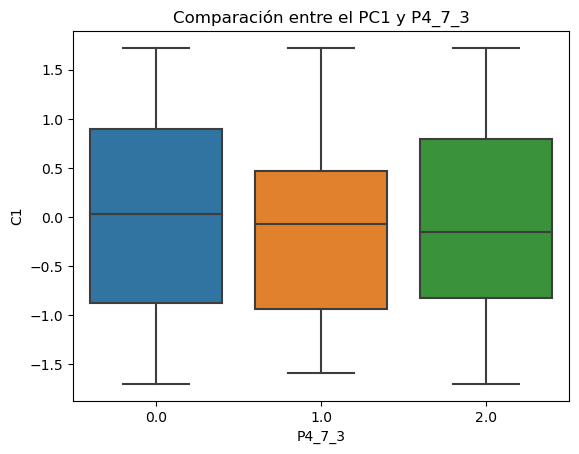

____________________________________________________________________________________________________
KendallTau: 0.038983519247637315
Pearson: 0.029724202154276833
Spearman: 0.05041001769682006


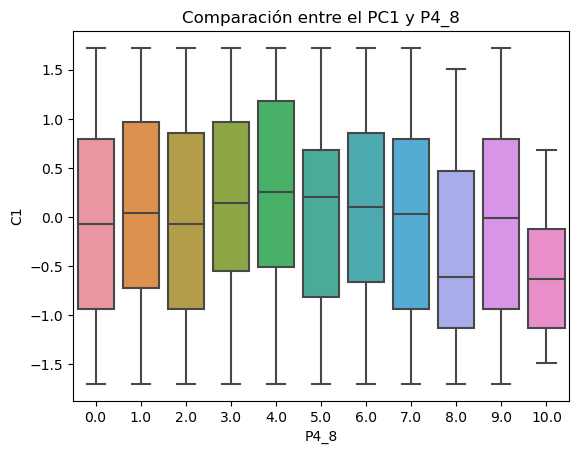

____________________________________________________________________________________________________
KendallTau: -0.002397203953389026
Pearson: 0.002993300079315925
Spearman: -0.0031326179827889924


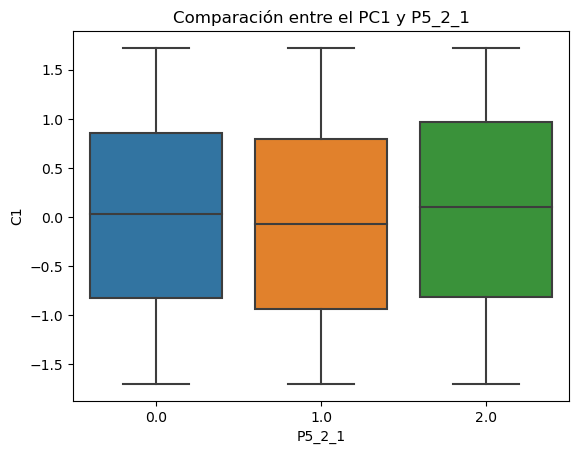

____________________________________________________________________________________________________
KendallTau: -0.01903348408867833
Pearson: -0.02747569195380448
Spearman: -0.024326618640595536


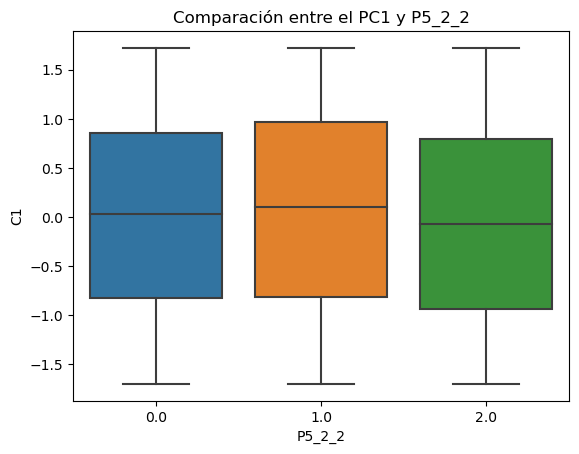

____________________________________________________________________________________________________
KendallTau: -0.012132630232189223
Pearson: -0.015661716077521298
Spearman: -0.015087519375682765


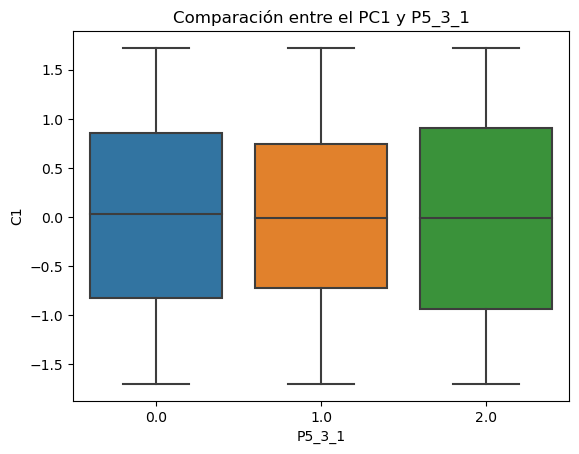

____________________________________________________________________________________________________
KendallTau: -0.01161593978693211
Pearson: -0.014801631958909486
Spearman: -0.014255799743241537


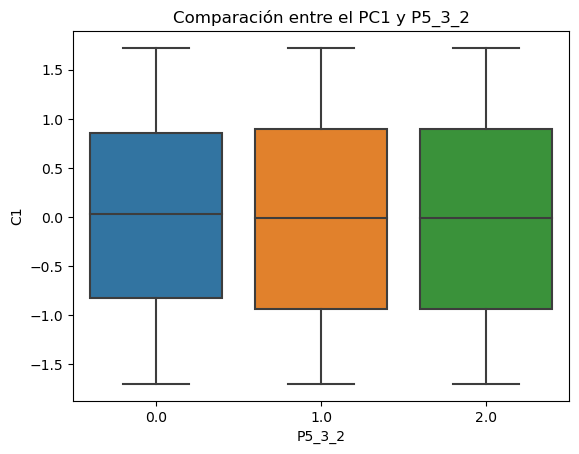

____________________________________________________________________________________________________
KendallTau: -0.0024996197651308556
Pearson: -0.004541011210108322
Spearman: -0.003255226743400082


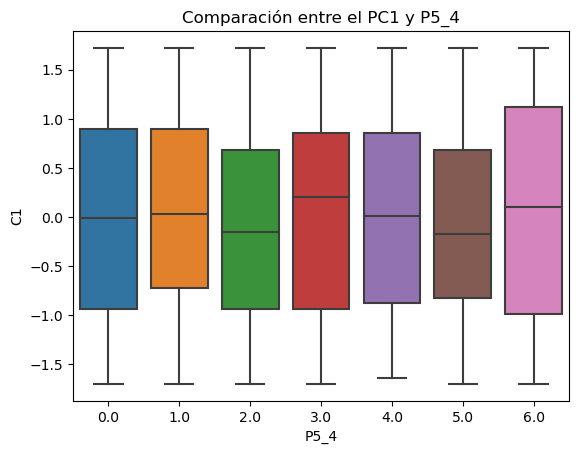

____________________________________________________________________________________________________
KendallTau: 0.046639805236386285
Pearson: 0.057923156533825126
Spearman: 0.0605959656580693


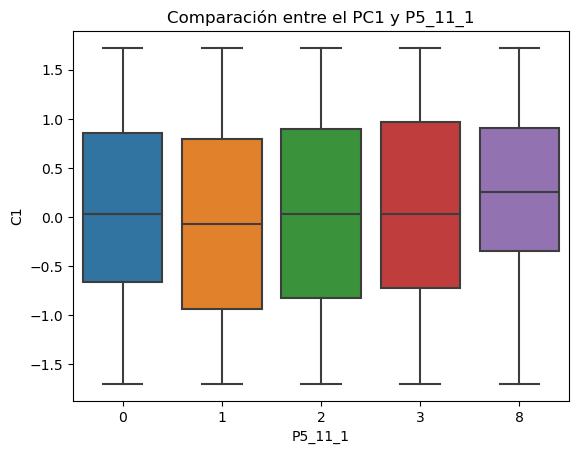

____________________________________________________________________________________________________
KendallTau: 0.004120145331570855
Pearson: 0.005662573149330102
Spearman: 0.005361573898199827


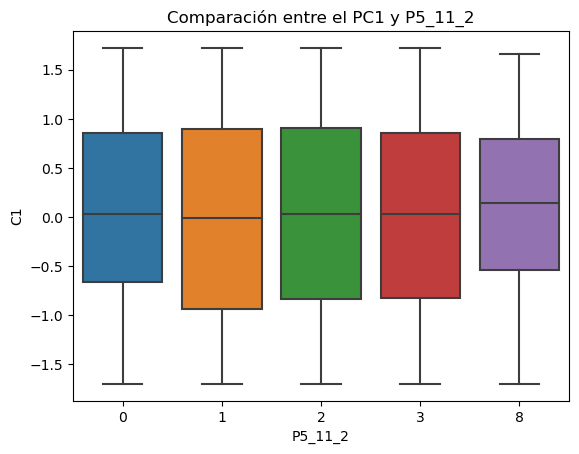

____________________________________________________________________________________________________
KendallTau: 0.042075978548009756
Pearson: 0.050785052603265775
Spearman: 0.05350934221103753


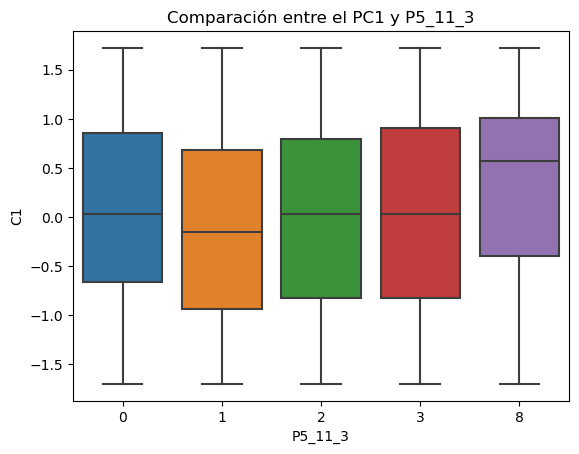

____________________________________________________________________________________________________


In [16]:
for col_name in endutih21[endutih21.columns[23:-1]]:
    col = endutih21[col_name]
    correlacion(c1,col)
    plot_correlacion(c1, col, col_name)
    print("_"*100)

#### ICA

In [17]:
ica = FastICA(n_components=1)

In [18]:
ica.fit(endutih21[columnas.keys()])

FastICA(n_components=1)

In [19]:
#Primer componente
c1 = ica.transform(endutih21[columnas.keys()]).ravel()
c1

array([ 0.00704039,  0.00704039,  0.00704035, ..., -0.0071413 ,
       -0.0071413 , -0.0071413 ])

**Comparativa con las demás variables**

KendallTau: 0.028980178152187983
Pearson: 0.037982512166040594
Spearman: 0.03955089041988953


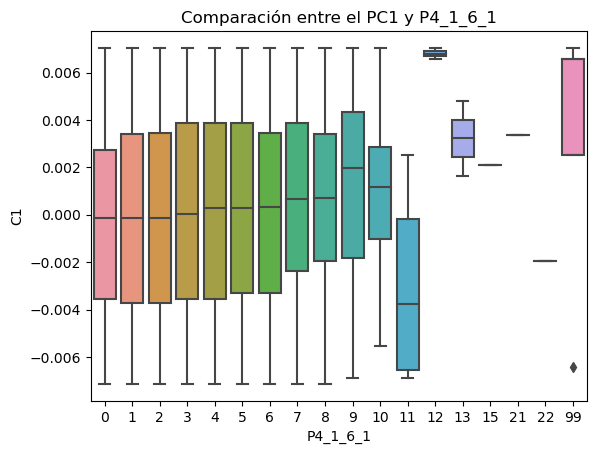

____________________________________________________________________________________________________
KendallTau: -0.03738896463592329
Pearson: -0.04514261655957087
Spearman: -0.04579153573496679


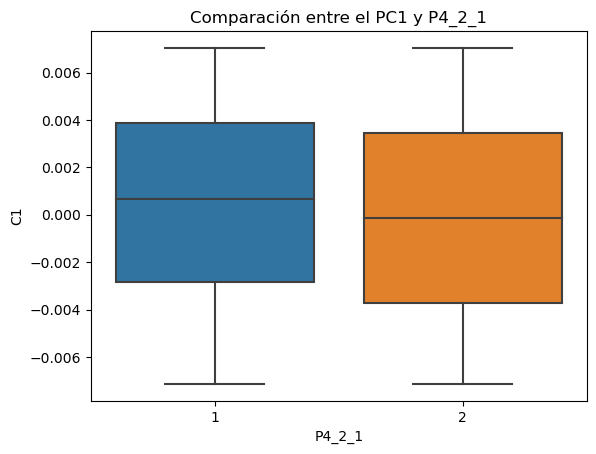

____________________________________________________________________________________________________
KendallTau: -0.03857641515632806
Pearson: -0.046767917322100026
Spearman: -0.047245846745397294


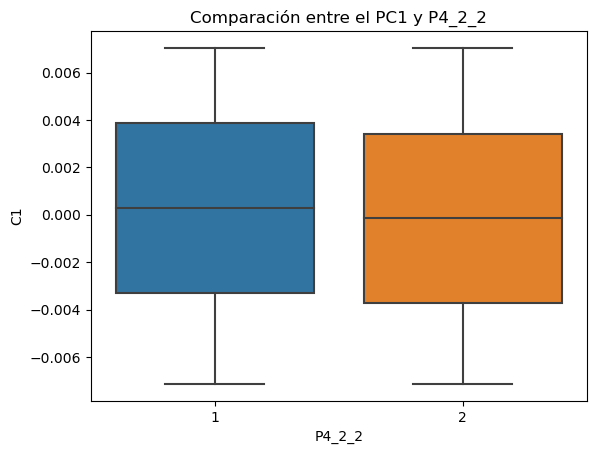

____________________________________________________________________________________________________
KendallTau: -0.04044806107236366
Pearson: -0.04920654170123186
Spearman: -0.04953811511072675


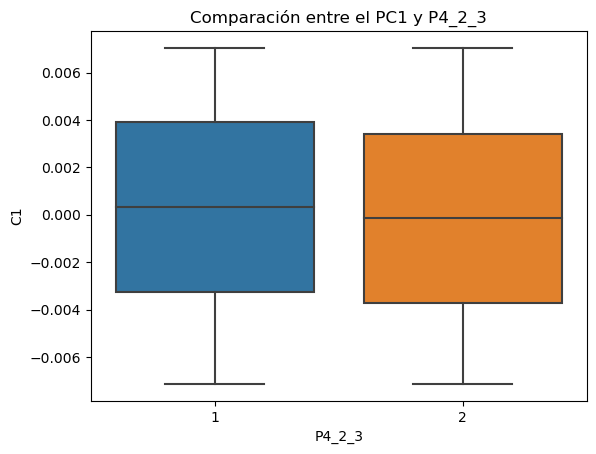

____________________________________________________________________________________________________
KendallTau: -0.0373852969821627
Pearson: -0.034881903511848764
Spearman: -0.04928975609322754


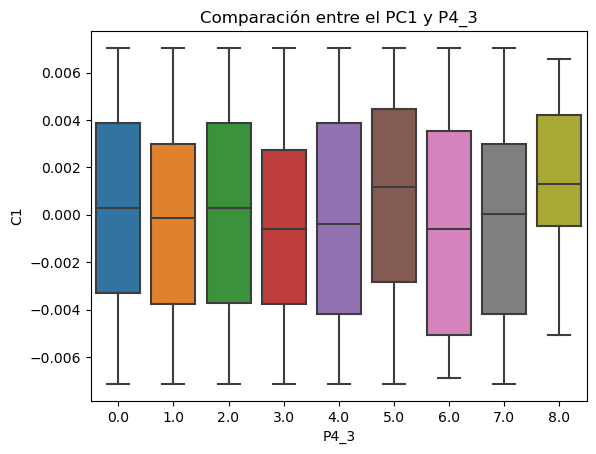

____________________________________________________________________________________________________
KendallTau: 0.050245590977079924
Pearson: 0.06734670101216009
Spearman: 0.06499384294962582


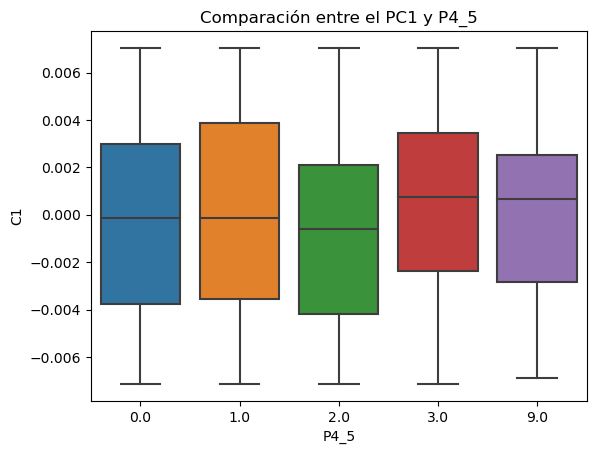

____________________________________________________________________________________________________
KendallTau: 0.04875459992680846
Pearson: 0.060678867103936836
Spearman: 0.06292026483249263


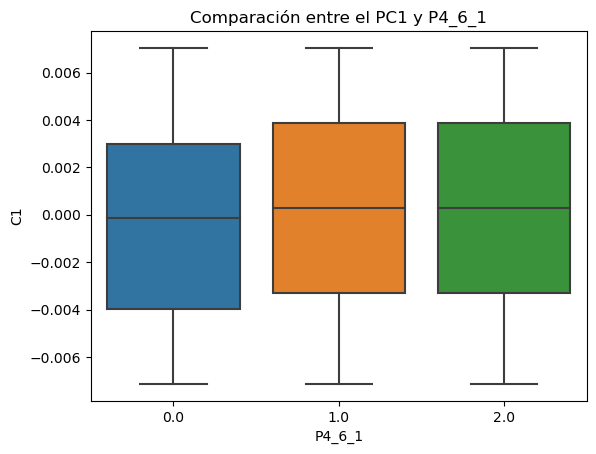

____________________________________________________________________________________________________
KendallTau: 0.04041703504800994
Pearson: 0.048638538618580016
Spearman: 0.052173054234431096


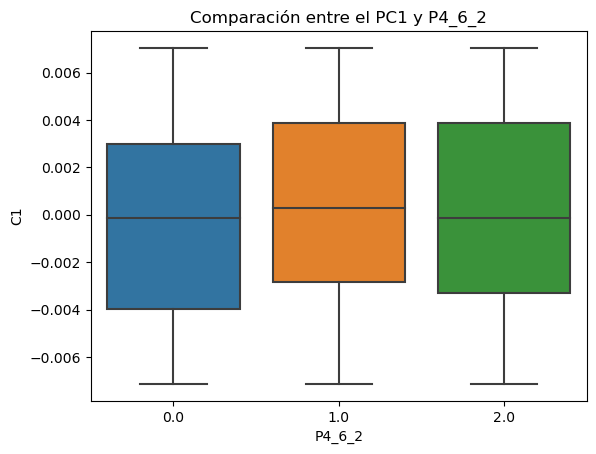

____________________________________________________________________________________________________
KendallTau: 0.05929684578556992
Pearson: 0.07395670324154477
Spearman: 0.07417613828546041


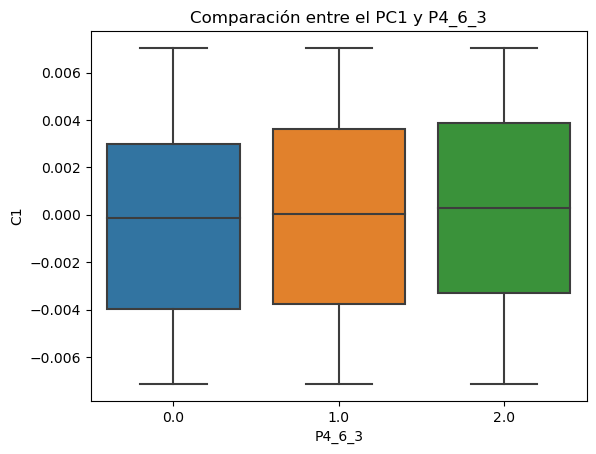

____________________________________________________________________________________________________
KendallTau: 0.06357873819011405
Pearson: 0.07789084858497478
Spearman: 0.07858508971706332


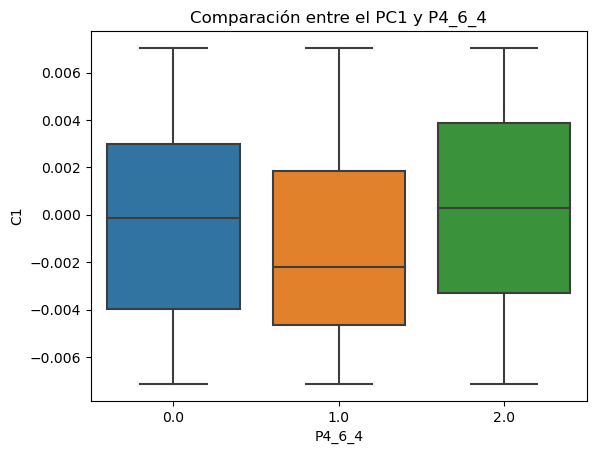

____________________________________________________________________________________________________
KendallTau: 0.05717342731633392
Pearson: 0.06990933544923572
Spearman: 0.07005574977457457


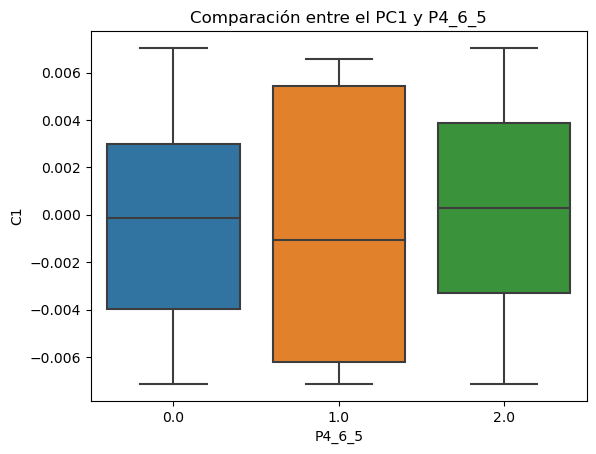

____________________________________________________________________________________________________
KendallTau: 0.03755415825063096
Pearson: 0.047086738874281
Spearman: 0.04605565329904473


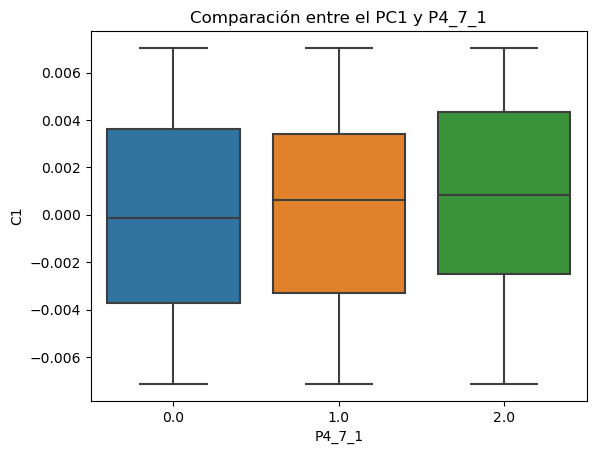

____________________________________________________________________________________________________
KendallTau: 0.0375210555983238
Pearson: 0.047145640717458304
Spearman: 0.04605727536261546


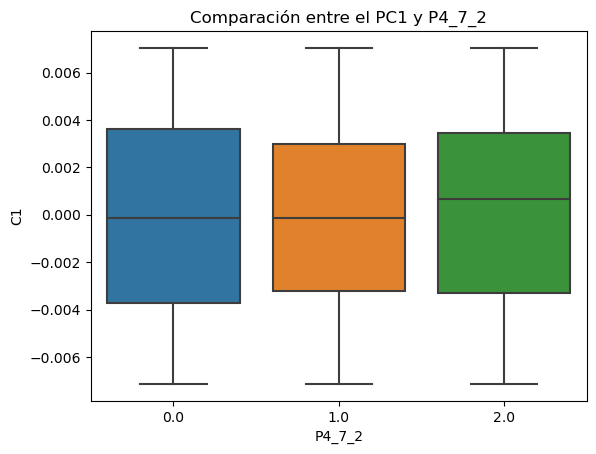

____________________________________________________________________________________________________
KendallTau: 0.03723024927070371
Pearson: 0.046183653104862436
Spearman: 0.04571811558165193


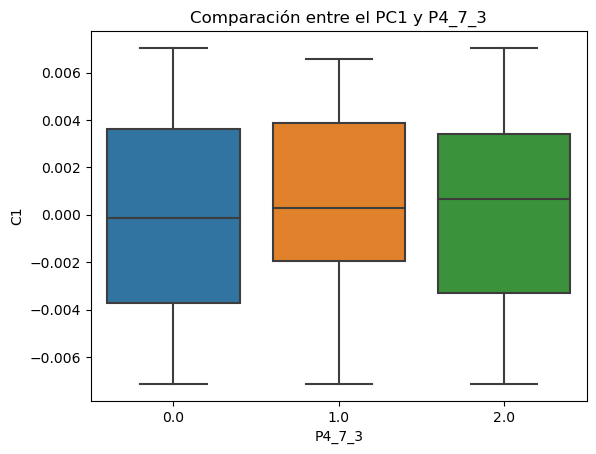

____________________________________________________________________________________________________
KendallTau: -0.038978672827371635
Pearson: -0.029724202162544455
Spearman: -0.05040273318998473


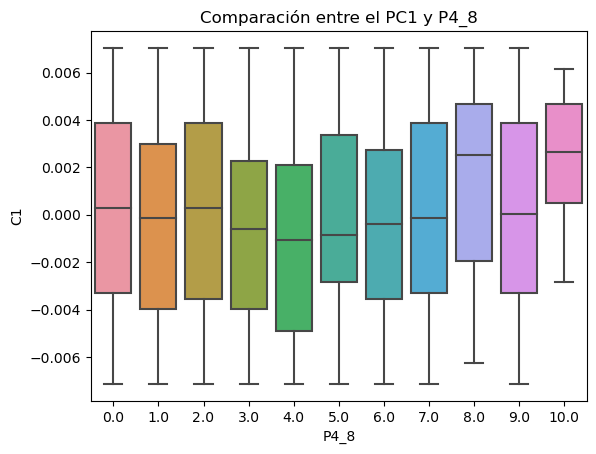

____________________________________________________________________________________________________
KendallTau: 0.002393607098584869
Pearson: -0.0029933000820164947
Spearman: 0.0031273537392256336


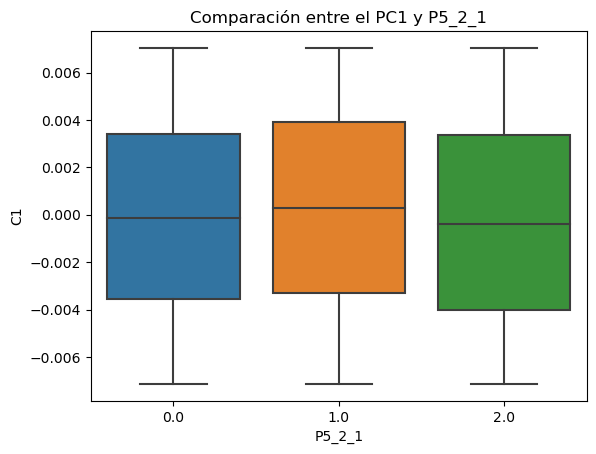

____________________________________________________________________________________________________
KendallTau: 0.019030169749888283
Pearson: 0.027475691960781427
Spearman: 0.0243230249678196


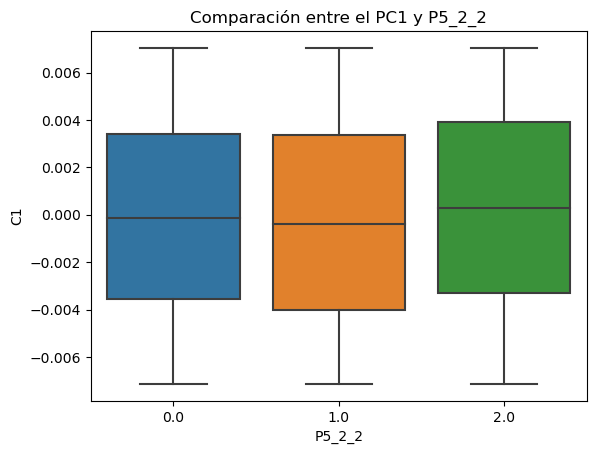

____________________________________________________________________________________________________
KendallTau: 0.012128554242176095
Pearson: 0.015661716080359482
Spearman: 0.015082556425107065


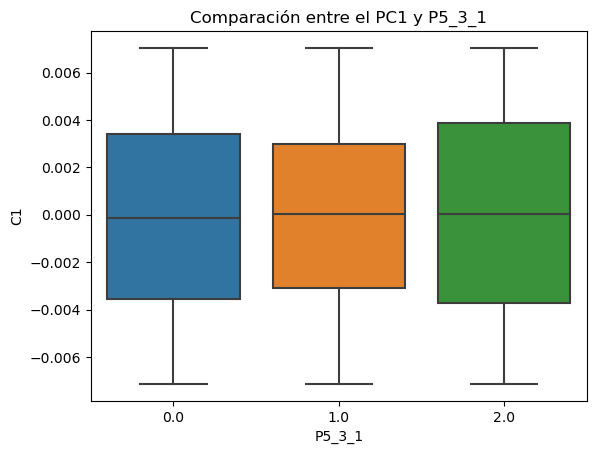

____________________________________________________________________________________________________
KendallTau: 0.011612212580361696
Pearson: 0.014801631961711689
Spearman: 0.014251221320143153


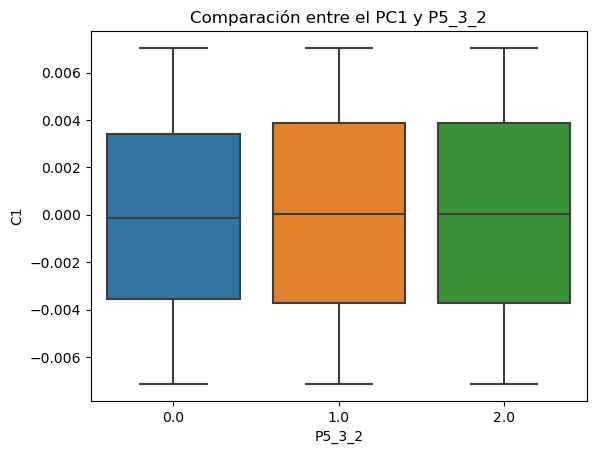

____________________________________________________________________________________________________
KendallTau: 0.0025019610691996764
Pearson: 0.00454101120942375
Spearman: 0.00325846144990923


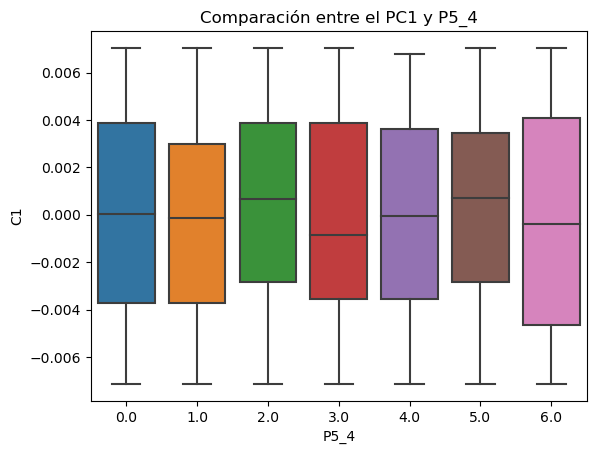

____________________________________________________________________________________________________
KendallTau: -0.046638794517354594
Pearson: -0.057923156540666904
Spearman: -0.060597276316917345


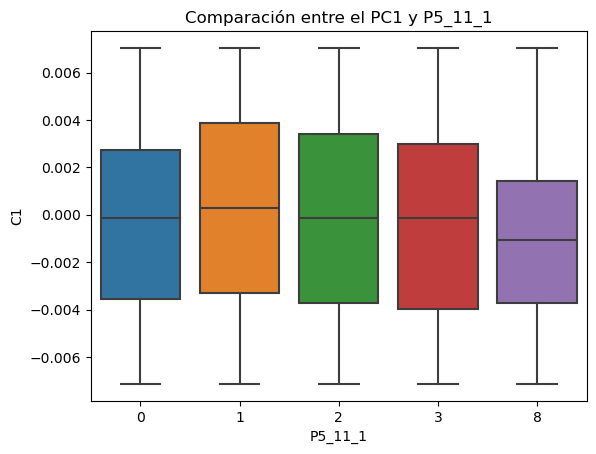

____________________________________________________________________________________________________
KendallTau: -0.004122240543024502
Pearson: -0.005662573147626052
Spearman: -0.005365058154286505


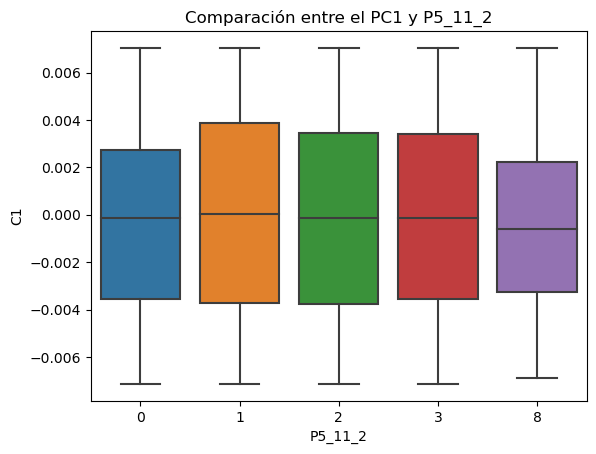

____________________________________________________________________________________________________
KendallTau: -0.04207563508116682
Pearson: -0.05078505260707407
Spearman: -0.05351069214141649


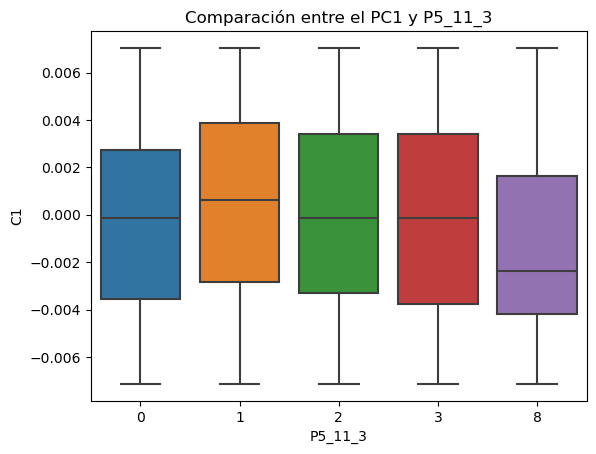

____________________________________________________________________________________________________


In [20]:
for col_name in endutih21[endutih21.columns[23:-1]]:
    col = endutih21[col_name]
    correlacion(c1,col)
    plot_correlacion(c1, col, col_name)
    print("_"*100)

#### NMF

In [20]:
nmf = NMF(n_components=1)

In [21]:
nmf.fit(endutih21[columnas.keys()])

NMF(n_components=1)

In [22]:
#Primer componente
c1 = nmf.transform(endutih21[columnas.keys()]).ravel()
c1

array([  4.71159465,   4.71159465,   4.71196758, ..., 152.00477379,
       152.00477379, 152.00477379])

**Comparativa con las demás variables**

KendallTau: -0.028833566727774824
Pearson: -0.037982512164286344
Spearman: -0.03937028554110723


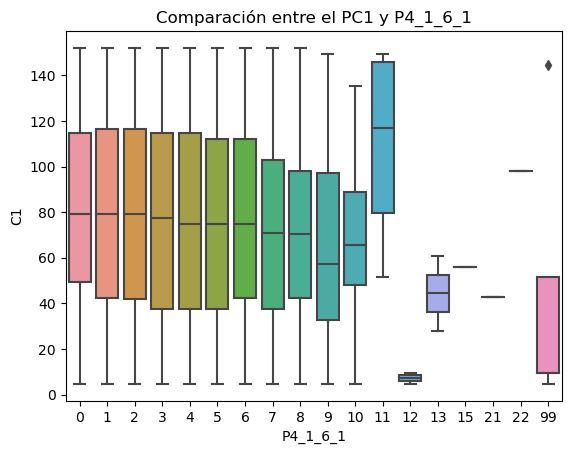

____________________________________________________________________________________________________
KendallTau: 0.037339455957150665
Pearson: 0.045142616559151985
Spearman: 0.04573090253125119


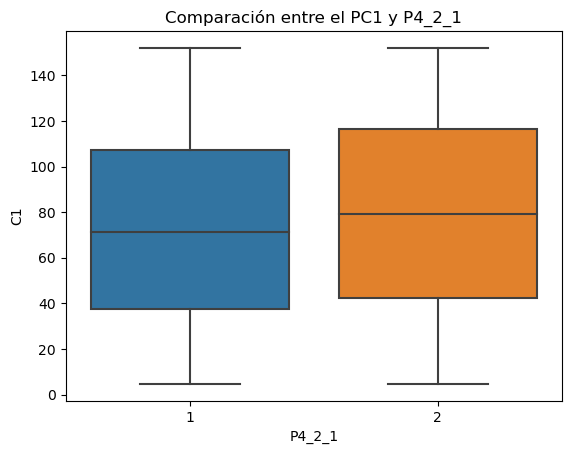

____________________________________________________________________________________________________
KendallTau: 0.038491569570088605
Pearson: 0.04676791732147565
Spearman: 0.04714193528434364


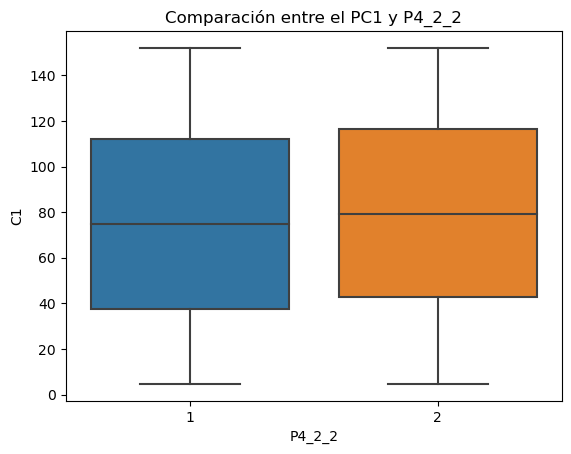

____________________________________________________________________________________________________
KendallTau: 0.040391671820794436
Pearson: 0.04920654170070651
Spearman: 0.049469055179345724


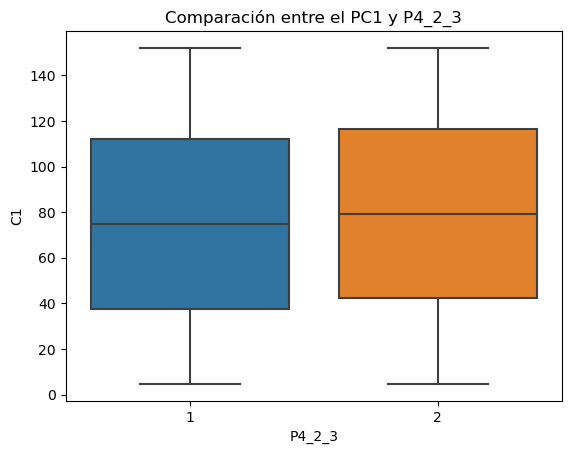

____________________________________________________________________________________________________
KendallTau: 0.03727977230817781
Pearson: 0.03488190351089188
Spearman: 0.04915312875154855


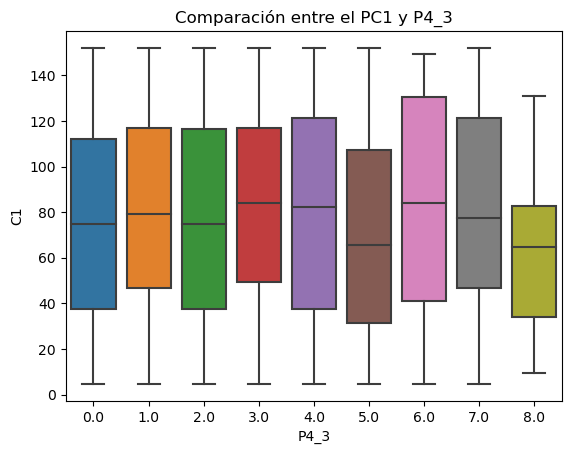

____________________________________________________________________________________________________
KendallTau: -0.05014856805433361
Pearson: -0.06734670101160015
Spearman: -0.06487368493078591


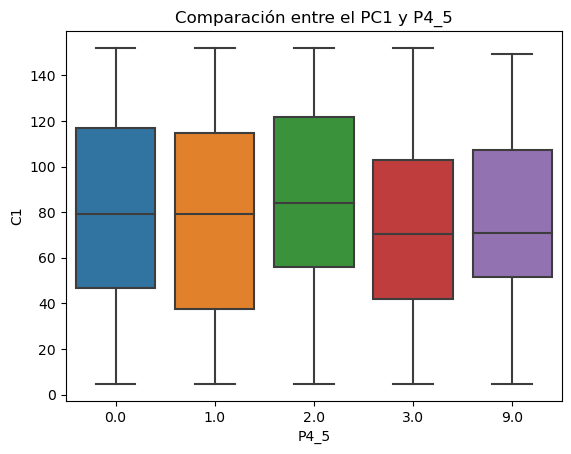

____________________________________________________________________________________________________
KendallTau: -0.04866324811727522
Pearson: -0.06067886710317019
Spearman: -0.06279933178014716


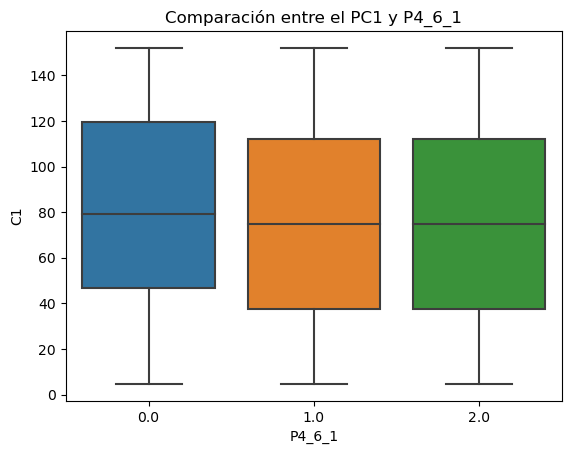

____________________________________________________________________________________________________
KendallTau: -0.04032156698242565
Pearson: -0.048638538617839996
Spearman: -0.05204238363850529


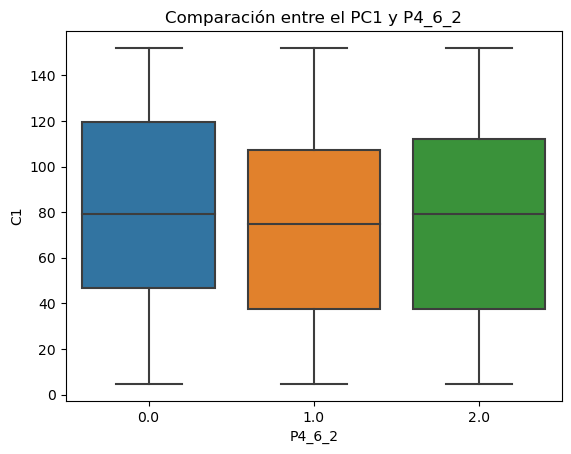

____________________________________________________________________________________________________
KendallTau: -0.05919329179161629
Pearson: -0.07395670324079323
Spearman: -0.07405408403483661


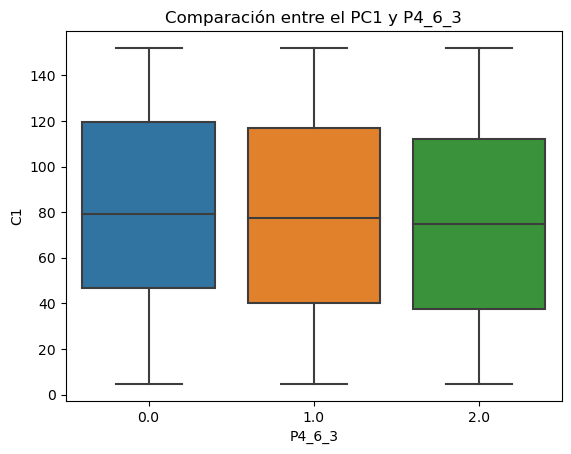

____________________________________________________________________________________________________
KendallTau: -0.0634722169808146
Pearson: -0.07789084858418371
Spearman: -0.07845619011467113


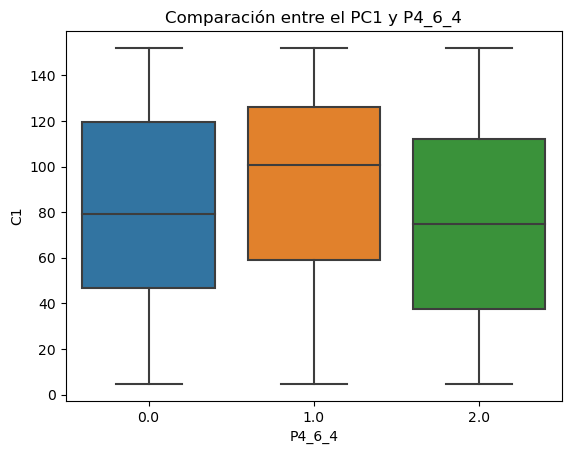

____________________________________________________________________________________________________
KendallTau: -0.05706611261910268
Pearson: -0.06990933544843073
Spearman: -0.06992426718510773


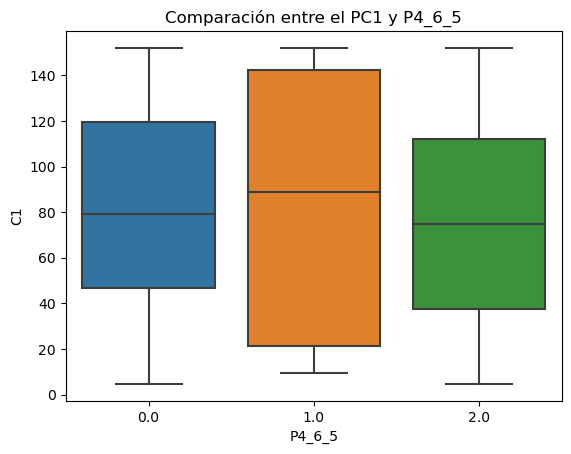

____________________________________________________________________________________________________
KendallTau: -0.03752045953303094
Pearson: -0.04708673887402639
Spearman: -0.046014155100486225


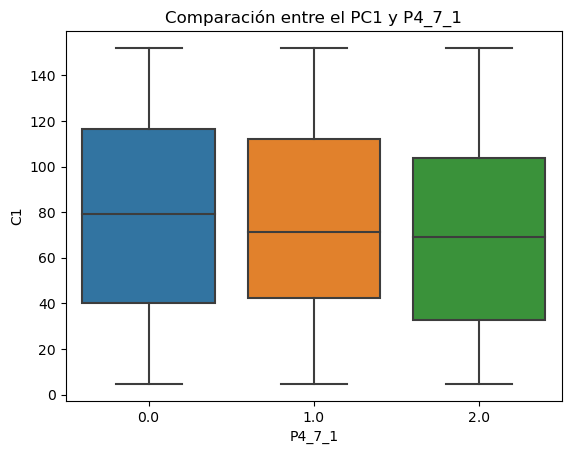

____________________________________________________________________________________________________
KendallTau: -0.03748729538542001
Pearson: -0.04714564071720823
Spearman: -0.04601602767904633


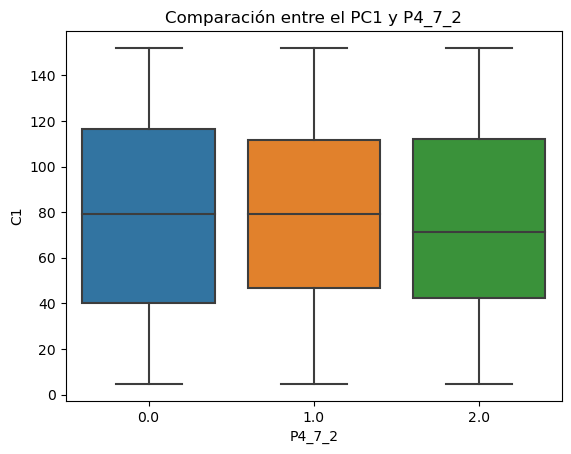

____________________________________________________________________________________________________
KendallTau: -0.037196760041031195
Pearson: -0.04618365310461502
Spearman: -0.045676816396241604


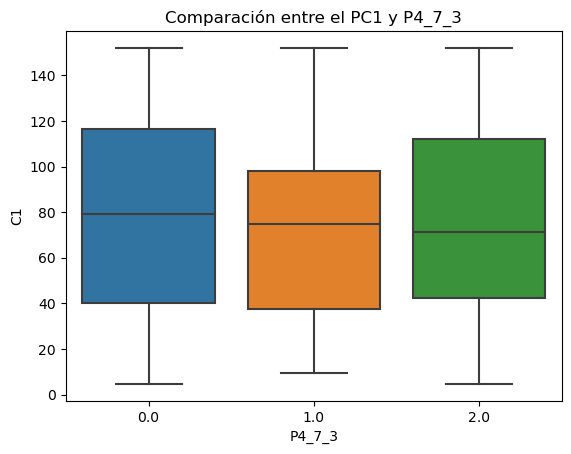

____________________________________________________________________________________________________
KendallTau: 0.03886812541061568
Pearson: 0.029724202161879112
Spearman: 0.05026328118505785


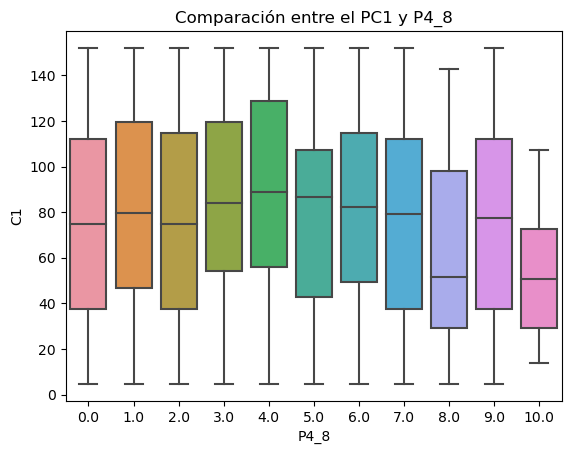

____________________________________________________________________________________________________
KendallTau: -0.002340452323039941
Pearson: 0.0029933000825741974
Spearman: -0.003055583504426433


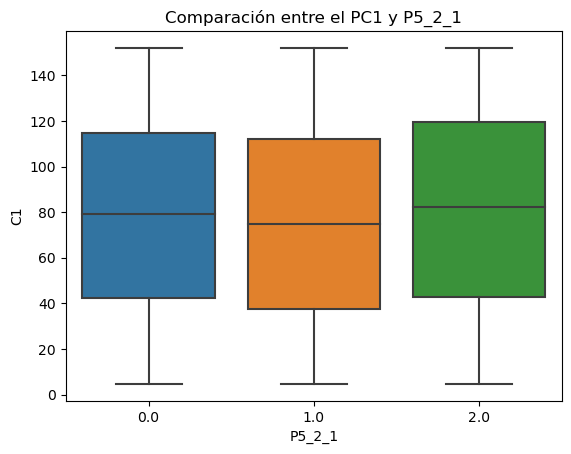

____________________________________________________________________________________________________
KendallTau: -0.018972689890084275
Pearson: -0.02747569196022842
Spearman: -0.02425300803505796


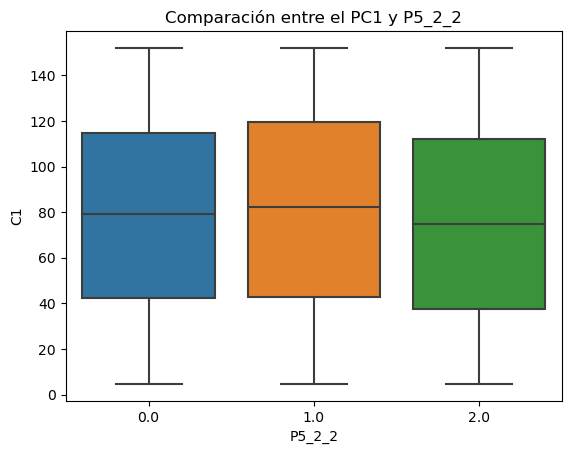

____________________________________________________________________________________________________
KendallTau: -0.012068665725096059
Pearson: -0.01566171607978765
Spearman: -0.015008766862177197


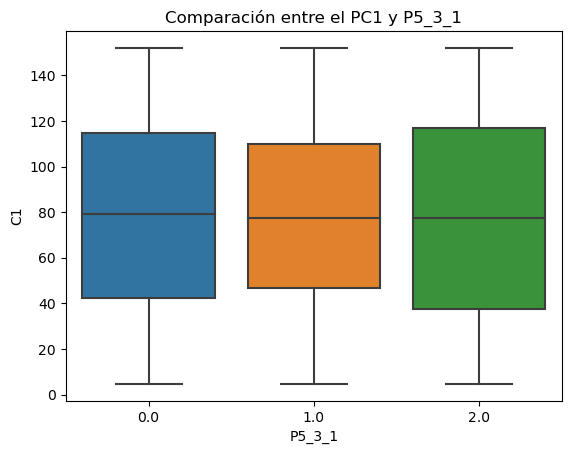

____________________________________________________________________________________________________
KendallTau: -0.011552157275936514
Pearson: -0.014801631961106693
Spearman: -0.01417742346942882


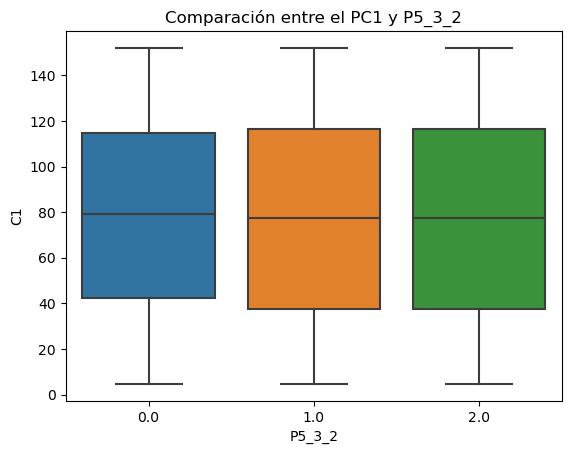

____________________________________________________________________________________________________
KendallTau: -0.002551928925739257
Pearson: -0.004541011209995608
Spearman: -0.0033242475883156126


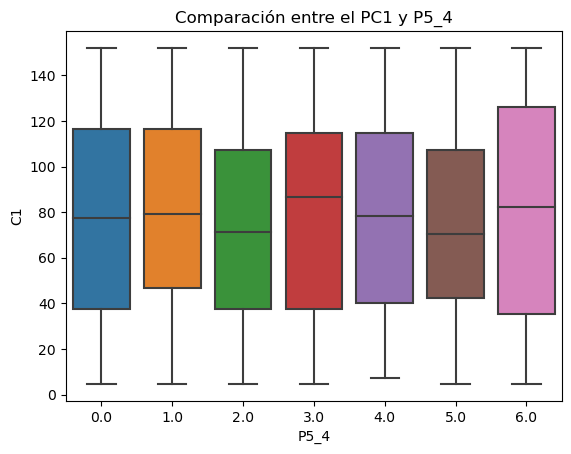

____________________________________________________________________________________________________
KendallTau: 0.046593406605077964
Pearson: 0.05792315654049686
Spearman: 0.06055200974118434


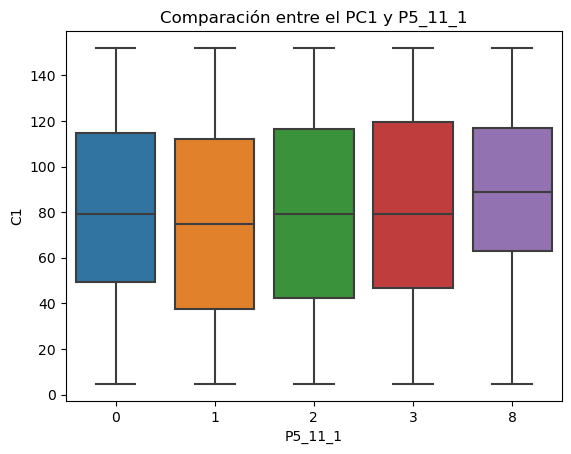

____________________________________________________________________________________________________
KendallTau: 0.004115251684098015
Pearson: 0.005662573147553971
Spearman: 0.005359442713319405


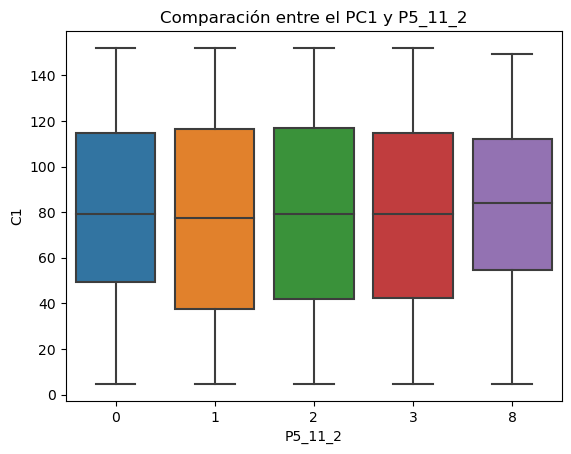

____________________________________________________________________________________________________
KendallTau: 0.04205757377029445
Pearson: 0.05078505260722332
Spearman: 0.053497723287333356


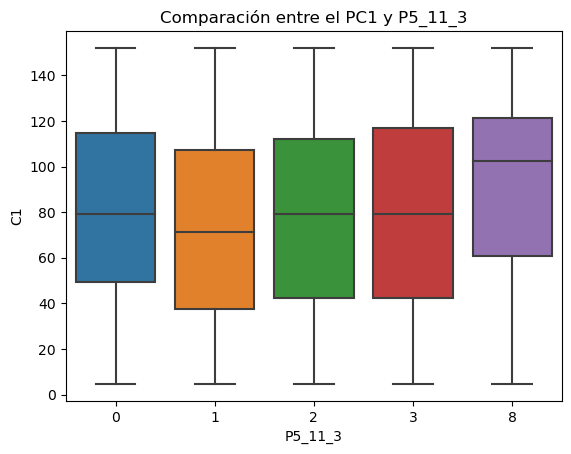

____________________________________________________________________________________________________


In [23]:
for col_name in endutih21[endutih21.columns[23:-1]]:
    col = endutih21[col_name]
    correlacion(c1,col)
    plot_correlacion(c1, col, col_name)
    print("_"*100)

------------

### ENIGH -> ENDUTIH

#### PCA

In [21]:
pca = PCA(n_components=1)

In [22]:
pca.fit(enigh21[columnas.keys()])

PCA(n_components=1)

In [24]:
pca.explained_variance_ratio_*100

array([99.9949088])

In [26]:
#Primer componente
c1 = pca.transform(enigh21[columnas.keys()]).ravel()
c1

array([ 5170.54886568,  5170.54886017,  5169.54888432, ...,
       -4977.38376776, -4977.38368114, -4977.38362138])

**Comparativa con las demás variables**

KendallTau: 0.022270486399031106
Pearson: 0.025779467680391247
Spearman: 0.027332696581766736


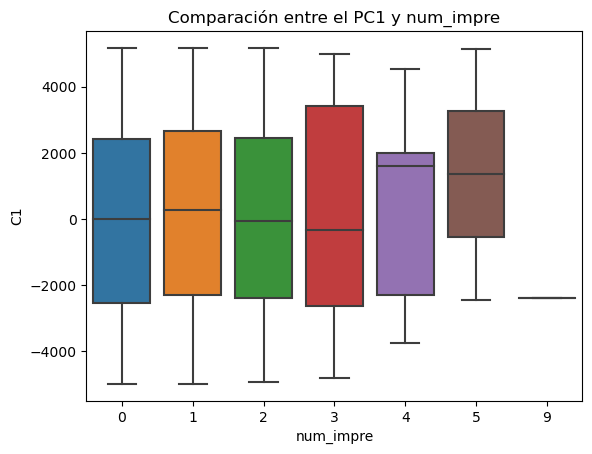

____________________________________________________________________________________________________


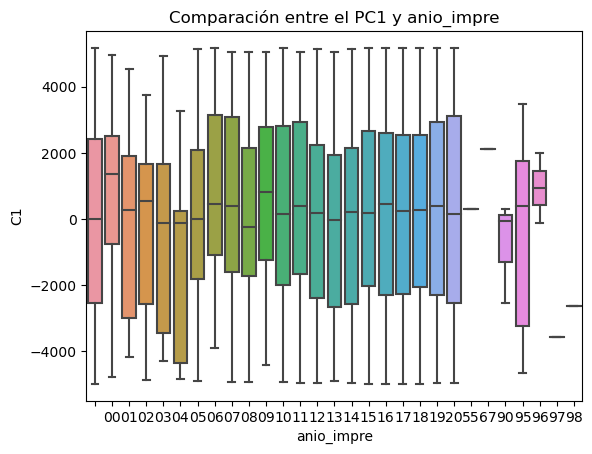

____________________________________________________________________________________________________
KendallTau: 0.03429557754602162
Pearson: 0.03799751926696588
Spearman: 0.042833995554312894


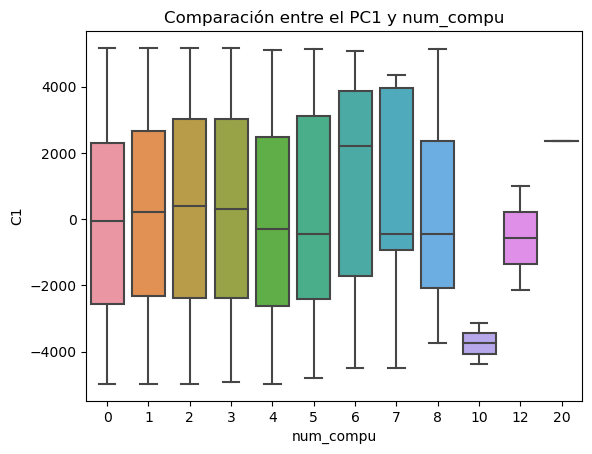

____________________________________________________________________________________________________


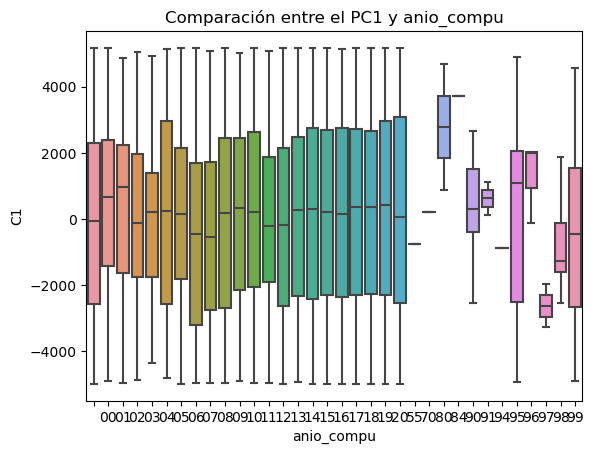

____________________________________________________________________________________________________
KendallTau: 0.04497520911739377
Pearson: 0.048119201882925414
Spearman: 0.055281774776968676


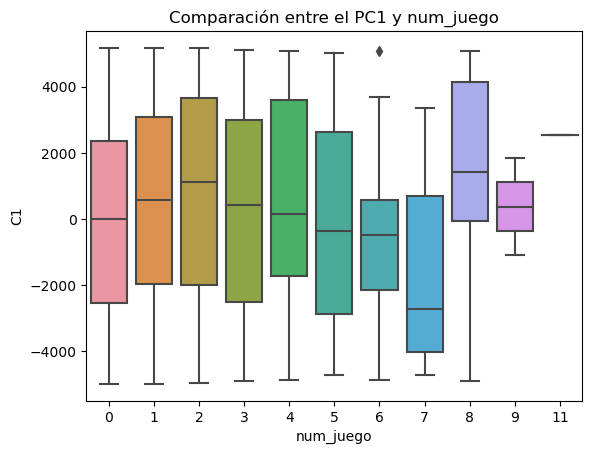

____________________________________________________________________________________________________


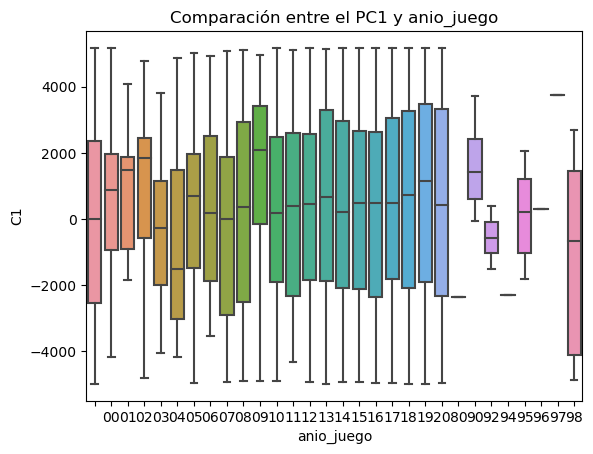

____________________________________________________________________________________________________
KendallTau: 0.007968713019837094
Pearson: 0.010224521304801844
Spearman: 0.00975958402144141


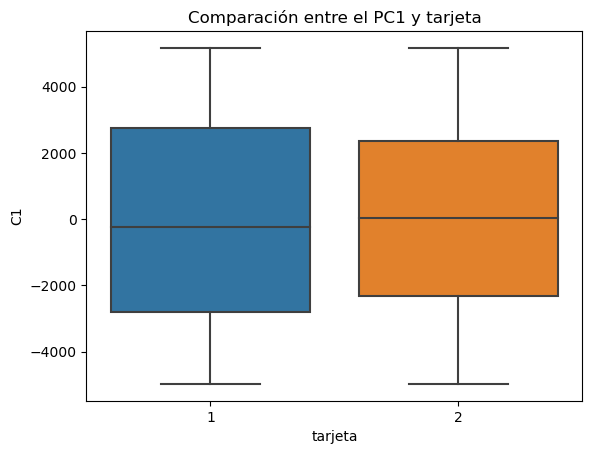

____________________________________________________________________________________________________


In [27]:
for col_name in enigh21[enigh21.columns[23:-1]]:
    col = enigh21[col_name]
    try:
        correlacion(c1,col)
    except:
        pass
    plot_correlacion(c1, col, col_name)
    print("_"*100)

#### FA

In [28]:
fa = FactorAnalysis(n_components=1)

In [29]:
fa.fit(enigh21[columnas.keys()])

FactorAnalysis(n_components=1)

In [30]:
#Primer componente
c1 = fa.transform(enigh21[columnas.keys()]).ravel()
c1

array([ 1.77683022,  1.77683023,  1.77648658, ..., -1.71043671,
       -1.7104366 , -1.71043659])

**Comparativa con las demás variables**

KendallTau: 0.022284614775297175
Pearson: 0.02577928016005738
Spearman: 0.02734998047490707


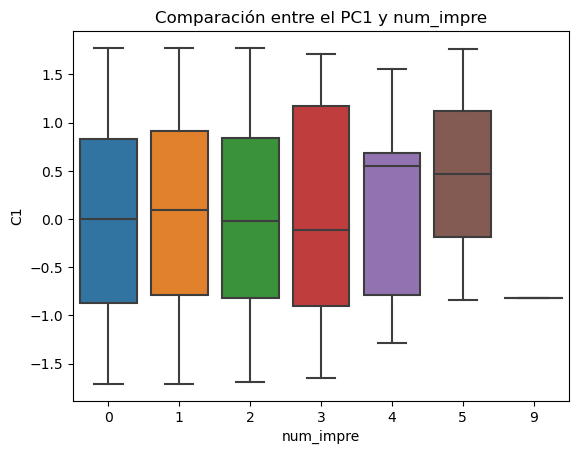

____________________________________________________________________________________________________


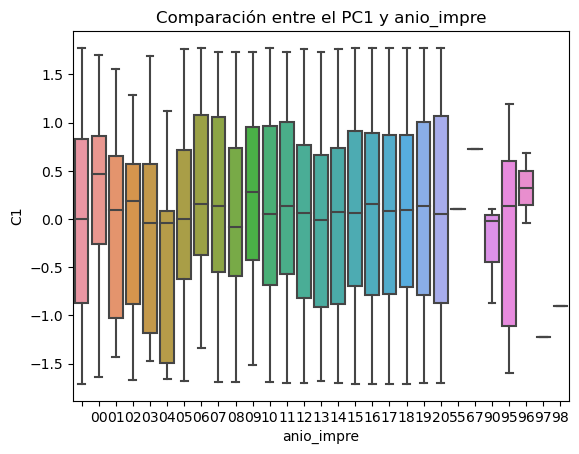

____________________________________________________________________________________________________
KendallTau: 0.03432107796912861
Pearson: 0.03799735350701593
Spearman: 0.04286483036753135


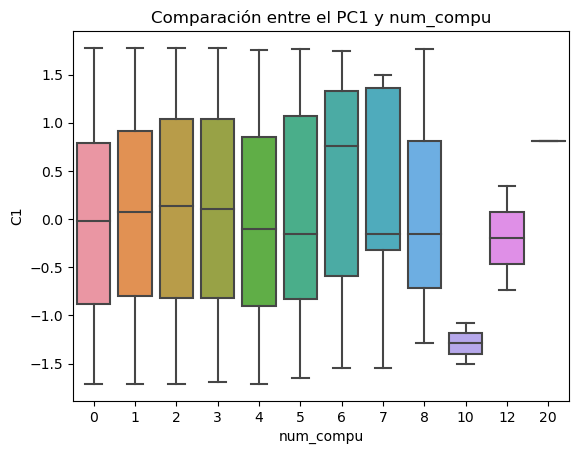

____________________________________________________________________________________________________


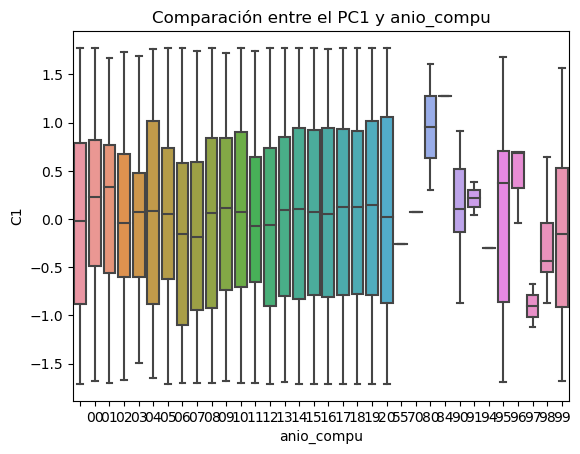

____________________________________________________________________________________________________
KendallTau: 0.044986847096419987
Pearson: 0.048119154031560925
Spearman: 0.055296036774866456


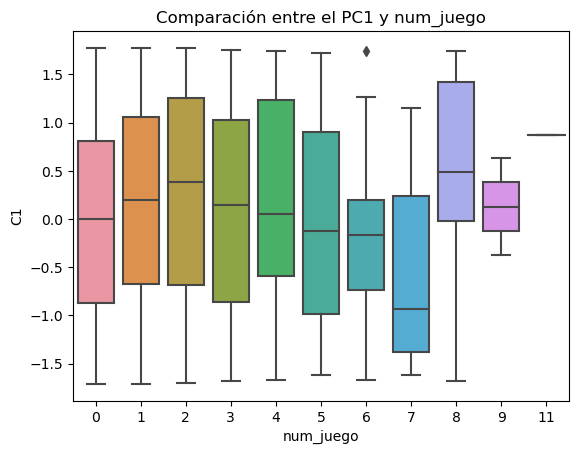

____________________________________________________________________________________________________


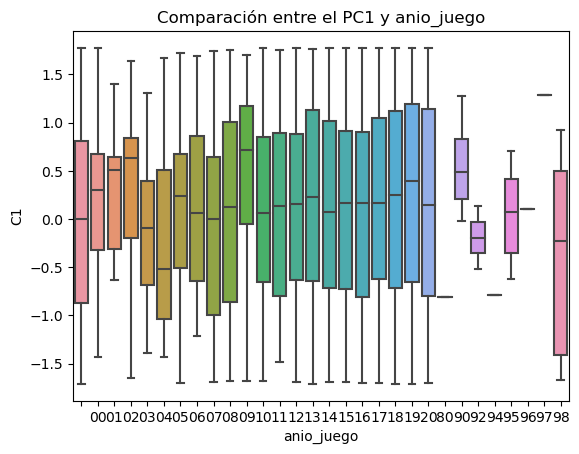

____________________________________________________________________________________________________
KendallTau: 0.007955787777234607
Pearson: 0.010224484998669453
Spearman: 0.009743753988302748


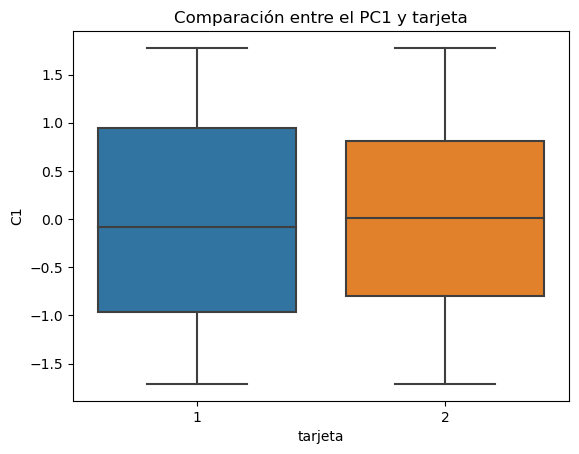

____________________________________________________________________________________________________


In [31]:
for col_name in enigh21[enigh21.columns[23:-1]]:
    col = enigh21[col_name]
    try:
        correlacion(c1,col)
    except:
        pass
    plot_correlacion(c1, col, col_name)
    print("_"*100)

#### ICA

In [32]:
ica = FastICA(n_components=1)

In [33]:
ica.fit(enigh21[columnas.keys()])

FastICA(n_components=1)

In [34]:
#Primer componente
c1 = ica.transform(enigh21[columnas.keys()]).ravel()
c1

array([-0.00595567, -0.00595567, -0.00595452, ...,  0.00573318,
        0.00573318,  0.00573318])

**Comparativa con las demás variables**

KendallTau: -0.022270486399031106
Pearson: -0.025779467680391258
Spearman: -0.027332696581766736


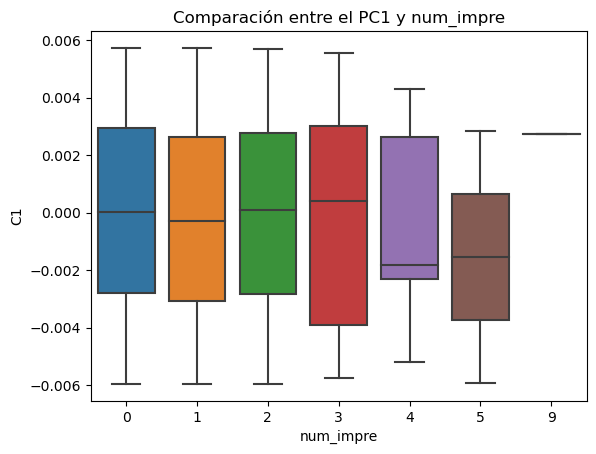

____________________________________________________________________________________________________


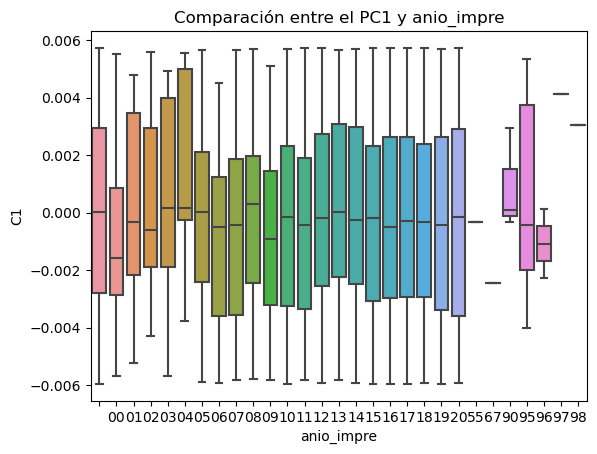

____________________________________________________________________________________________________
KendallTau: -0.03429557754602162
Pearson: -0.0379975192669659
Spearman: -0.042833995554312894


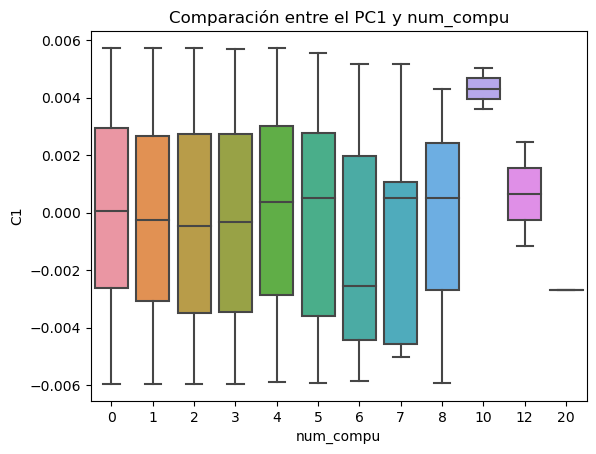

____________________________________________________________________________________________________


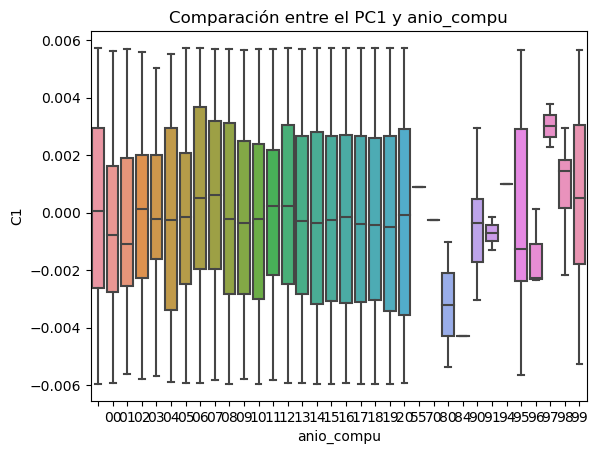

____________________________________________________________________________________________________
KendallTau: -0.04497520911739377
Pearson: -0.04811920188292542
Spearman: -0.055281774776968676


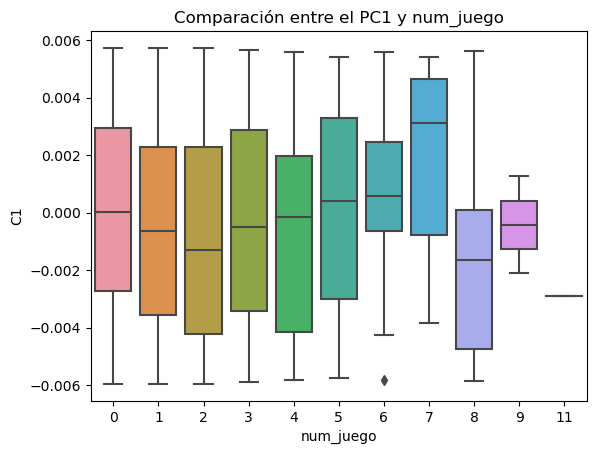

____________________________________________________________________________________________________


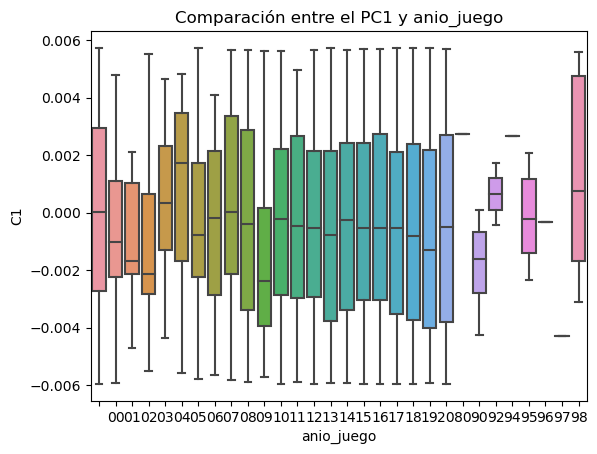

____________________________________________________________________________________________________
KendallTau: -0.007968713019837094
Pearson: -0.010224521304801837
Spearman: -0.00975958402144141


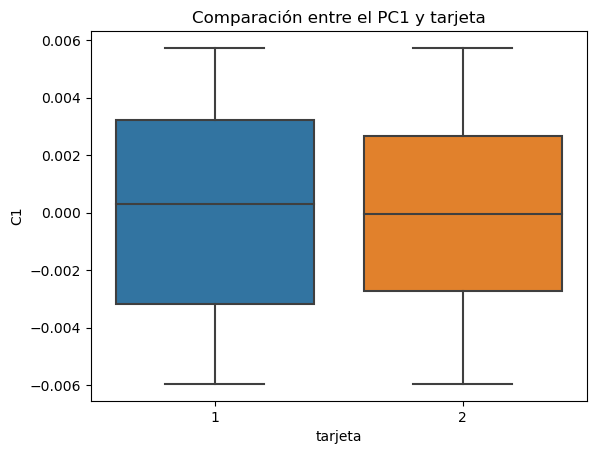

____________________________________________________________________________________________________


In [35]:
for col_name in enigh21[enigh21.columns[23:-1]]:
    col = enigh21[col_name]
    try:
        correlacion(c1,col)
    except:
        pass
    plot_correlacion(c1, col, col_name)
    print("_"*100)

#### NMF

In [36]:
nmf = NMF(n_components=1)

In [37]:
nmf.fit(enigh21[columnas.keys()])

NMF(n_components=1)

In [38]:
#Primer componente
c1 = nmf.transform(enigh21[columnas.keys()]).ravel()
c1

array([7.85712124e-04, 7.86233103e-04, 1.53695762e-03, ...,
       7.62765119e+00, 7.62765247e+00, 7.62765115e+00])

**Comparativa con las demás variables**

KendallTau: -0.022242652610926054
Pearson: -0.025778848474559402
Spearman: -0.027298592001680767


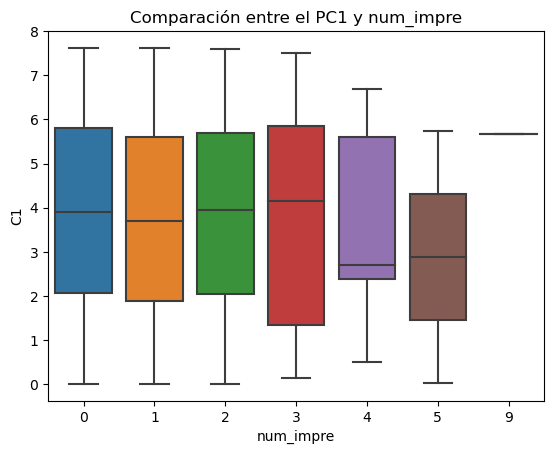

____________________________________________________________________________________________________


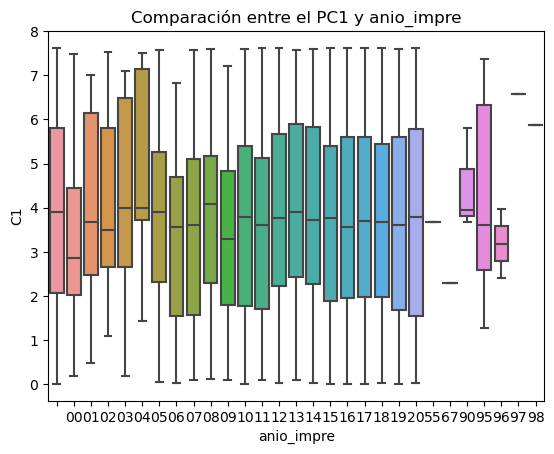

____________________________________________________________________________________________________
KendallTau: -0.03425131348601259
Pearson: -0.03799693622704711
Spearman: -0.04277958409562515


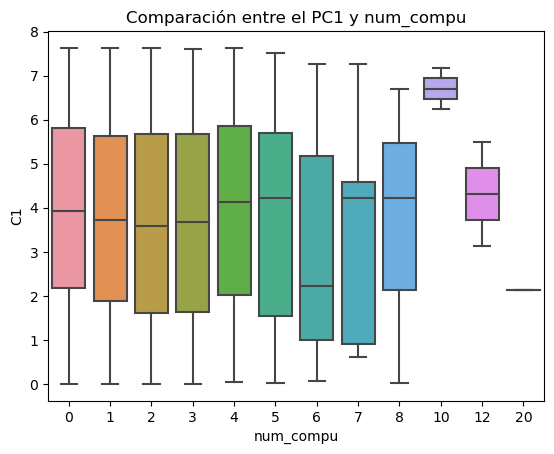

____________________________________________________________________________________________________


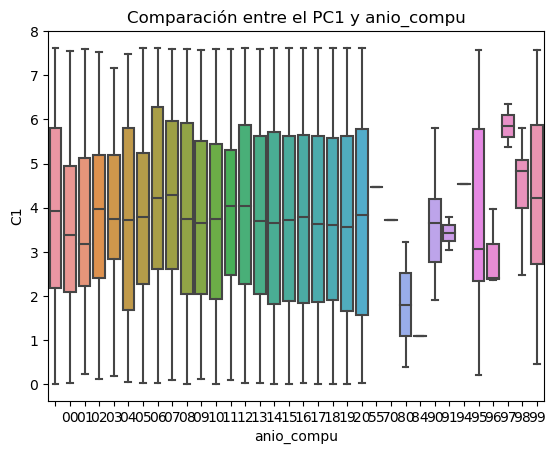

____________________________________________________________________________________________________
KendallTau: -0.04495760988894215
Pearson: -0.048119007913273074
Spearman: -0.05526022260793897


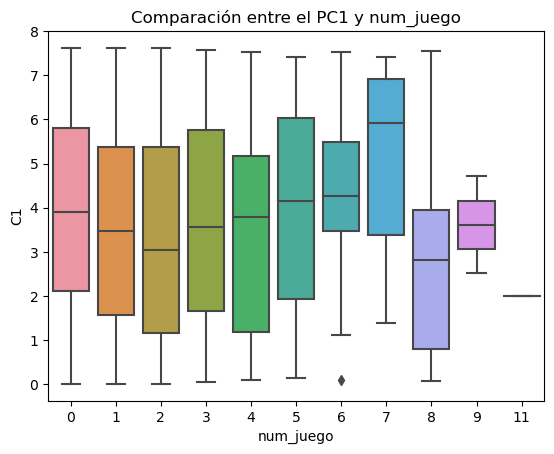

____________________________________________________________________________________________________


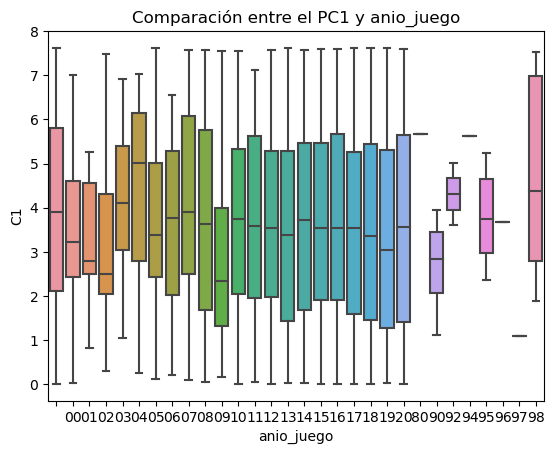

____________________________________________________________________________________________________
KendallTau: -0.007992839814443622
Pearson: -0.010224468857638004
Spearman: -0.009789133018694078


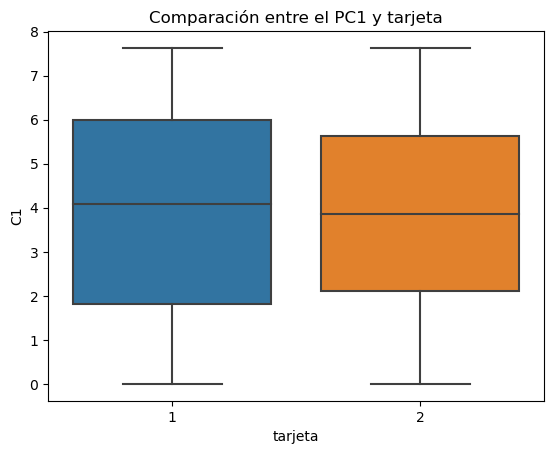

____________________________________________________________________________________________________


In [39]:
for col_name in enigh21[enigh21.columns[23:-1]]:
    col = enigh21[col_name]
    try:
        correlacion(c1,col)
    except:
        pass
    plot_correlacion(c1, col, col_name)
    print("_"*100)